<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bispectrum-counter-example" data-toc-modified-id="Bispectrum-counter-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bispectrum counter example</a></span><ul class="toc-item"><li><span><a href="#geometry-optimization" data-toc-modified-id="geometry-optimization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>geometry optimization</a></span></li><li><span><a href="#generate-dataset" data-toc-modified-id="generate-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>generate dataset</a></span></li><li><span><a href="#geometry-optimize" data-toc-modified-id="geometry-optimize-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>geometry optimize</a></span></li><li><span><a href="#feature-computation" data-toc-modified-id="feature-computation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>feature computation</a></span><ul class="toc-item"><li><span><a href="#not-normalized" data-toc-modified-id="not-normalized-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>not normalized</a></span></li><li><span><a href="#Compare-them" data-toc-modified-id="Compare-them-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Compare them</a></span></li><li><span><a href="#$\rho_{i}^{\otimes-3}$" data-toc-modified-id="$\rho_{i}^{\otimes-3}$-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>$\rho_{i}^{\otimes 3}$</a></span></li><li><span><a href="#check-map-between-three-center-and-single-center" data-toc-modified-id="check-map-between-three-center-and-single-center-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>check map between three center and single center</a></span></li><li><span><a href="#check-degeneracy-of-$\rho_{i}^{\otimes-3}$" data-toc-modified-id="check-degeneracy-of-$\rho_{i}^{\otimes-3}$-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>check degeneracy of $\rho_{i}^{\otimes 3}$</a></span></li><li><span><a href="#artificial-structure" data-toc-modified-id="artificial-structure-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>artificial structure</a></span></li></ul></li><li><span><a href="#encoder-decoder" data-toc-modified-id="encoder-decoder-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>encoder-decoder</a></span><ul class="toc-item"><li><span><a href="#tensormap-of-reconstructed-features" data-toc-modified-id="tensormap-of-reconstructed-features-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>tensormap of reconstructed features</a></span></li><li><span><a href="#train-different-blocks-separately" data-toc-modified-id="train-different-blocks-separately-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>train different blocks separately</a></span></li></ul></li><li><span><a href="#NICE-like-feature-reduction" data-toc-modified-id="NICE-like-feature-reduction-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>NICE like feature reduction</a></span></li><li><span><a href="#Load-NICE-style-features" data-toc-modified-id="Load-NICE-style-features-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Load NICE style features</a></span></li><li><span><a href="#encode-decodde-2" data-toc-modified-id="encode-decodde-2-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>encode-decodde 2</a></span><ul class="toc-item"><li><span><a href="#optimize-the-nonlinear-feature" data-toc-modified-id="optimize-the-nonlinear-feature-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>optimize the nonlinear feature</a></span></li><li><span><a href="#optimize-linear-encoded-model" data-toc-modified-id="optimize-linear-encoded-model-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>optimize linear encoded model</a></span></li></ul></li><li><span><a href="#Pair-error-metrics" data-toc-modified-id="Pair-error-metrics-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Pair error metrics</a></span></li><li><span><a href="#encoder-decoder-like-architecture---nope" data-toc-modified-id="encoder-decoder-like-architecture---nope-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>encoder-decoder like architecture - nope</a></span></li><li><span><a href="#derivatives-of-coordinates" data-toc-modified-id="derivatives-of-coordinates-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>derivatives of coordinates</a></span></li><li><span><a href="#old" data-toc-modified-id="old-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>old</a></span></li></ul></li></ul></div>

# Bispectrum counter example

In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
from ase.io import read,write
from ase.visualize import view
import numpy as np 

from equistore import Labels, TensorBlock, TensorMap
from itertools import product
from equistore_utils.clebsh_gordan import ClebschGordanReal

import matplotlib.pyplot as plt

# from equistore_utils.librascal import  RascalSphericalExpansion, RascalPairExpansion
# from rascal.representations import SphericalExpansion
from rascaline import SphericalExpansion
from rascaline import SphericalExpansionByPair as PairExpansion
from equistore import operations
import copy
import ase 
import tqdm 
import hickle

In [3]:
from equistore_utils.mp_utils import *

In [4]:
hypers = {
    "cutoff": 3.5,
    "max_radial": 5,
    "max_angular": 3,
    "atomic_gaussian_width": 0.2,
    "radial_basis": {"Gto": {}},
    "cutoff_function": {"ShiftedCosine": {"width": 0.1}},
    "center_atom_weight": 0.0,    
}
cg = ClebschGordanReal(5)


## geometry optimization 

In [5]:
from scipy.optimize import minimize, check_grad
from pyscf.pbc.tools.pyscf_ase import atoms_from_ase
from pyscf.geomopt.geometric_solver import optimize as pyscf_geopt
from ase.units import Bohr, Hartree

/scratch/nigam/anaconda3/envs/py3.7/lib/python3.8/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


In [143]:
def run_dft(structure, basis="ccpvdz", xc="pbe", chk_file="None"):
    mol = pyscf.gto.M(atom = atoms_from_ase(structure), basis = basis)
    rks = pyscf.dft.RKS(mol)
    if chk_file != "None":        
        rks.chkfile=chk_file
        rks.init_guess='chk'
    rks.diis_space = 20
    rks.xc = xc
    rks = pyscf.scf.addons.smearing_(rks, sigma=.01, method='fermi')    
    rks.scf(print=True)
    rks.energy = rks.e_free   # e_free is the correct energy when using a smearing...
    print("energy", rks.e_tot, " free energy", rks.e_free)
    return rks

def struc_energy(pos, symbols="Li8", basis="ccpvdz", xc="pbe", chk_file="None"):    
    struc = ase.Atoms(positions=pos.reshape((-1, 3)), symbols=symbols, pbc=False)
    rks = run_dft(struc, basis, xc, chk_file)
    return rks.energy

def struc_energy_grad(pos, symbols="Li8", basis="ccpvdz", xc="pbe", chk_file="None"):    
    struc = ase.Atoms(positions=pos.reshape((-1, 3)), symbols=symbols, pbc=False)
    rks = run_dft(struc, basis, xc, chk_file)
    dft = rks.energy # energy_tot()
    ddft = rks.nuc_grad_method().grad()/0.529177 # to Ha/Å
    return dft, ddft.flatten()

In [144]:
x0 = [1.524168421638125, 0.7538531811446212, 1.7260874285437044, 1.2342448086194877, 1.5602121460387863, 1.0291823135675853]
basis = "def2svp" # "ccpvdz"
xc = "pbe"
labels = ["B", "B", "B"]

pos0 = np.concatenate( [ [[0,0,0]],
                 [[1.6*np.cos(t), 1.6*np.sin(t),0] for t in np.linspace(0,np.pi*2,8)[1:] ] ]).flatten()
minstruc = minimize(struc_energy_grad, pos0, args=(labels[0]*8, basis, xc, "min.chk"), options={"maxiter": 100, "disp": True}, method="BFGS", jac=True)



WARN: Fail in reading min.chk. Use MINAO initial guess

converged SCF energy = -197.87398677912
energy -197.87398677912006  free energy -197.90545656907065
--------------- RKS gradients ---------------
         x                y                z
0 B    -0.0000144488     0.0000000000    -0.0000000000
1 B    -0.1051905231    -0.1319191464    -0.0000000000
2 B     0.0375381057    -0.1644889910     0.0000000000
3 B     0.1520198939    -0.0732158138    -0.0000000000
4 B     0.1520198939     0.0732158138     0.0000000000
5 B     0.0375381057     0.1644889910     0.0000000000
6 B    -0.1051905231     0.1319191464     0.0000000000
7 B    -0.1687286180     0.0000000000    -0.0000000000
----------------------------------------------

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -198.053189756951
energy -198.05318975695056  free energy -198.08274592356076
--------------- RKS gradi

         x                y                z
0 B    -0.0000014238    -0.0000000000    -0.0000000000
1 B     0.0000030661     0.0000016012     0.0000000000
2 B    -0.0000068804     0.0000030179    -0.0000000000
3 B    -0.0000014090     0.0000064070     0.0000000000
4 B    -0.0000014090    -0.0000064070    -0.0000000000
5 B    -0.0000068804    -0.0000030179    -0.0000000000
6 B     0.0000030661    -0.0000016012     0.0000000000
7 B     0.0000003140    -0.0000000000    -0.0000000000
----------------------------------------------
converged SCF energy = -198.08380441622
energy -198.08380441622032  free energy -198.11363795444865
--------------- RKS gradients ---------------
         x                y                z
0 B    -0.0000014236    -0.0000000000    -0.0000000000
1 B     0.0000028699     0.0000017925    -0.0000000000
2 B    -0.0000067798     0.0000030563    -0.0000000000
3 B    -0.0000013307     0.0000065884     0.0000000000
4 B    -0.0000013307    -0.0000065884    -0.0000000000
5 

converged SCF energy = -198.083804414762
energy -198.08380441476226  free energy -198.1136379534884
--------------- RKS gradients ---------------
         x                y                z
0 B    -0.0000013899    -0.0000000000     0.0000000000
1 B     0.0000007719     0.0000058184     0.0000000000
2 B    -0.0000088022     0.0000017292    -0.0000000000
3 B     0.0000012159     0.0000050675     0.0000000000
4 B     0.0000012158    -0.0000050675    -0.0000000000
5 B    -0.0000088022    -0.0000017293    -0.0000000000
6 B     0.0000007720    -0.0000058184    -0.0000000000
7 B     0.0000034623     0.0000000000    -0.0000000000
----------------------------------------------
converged SCF energy = -198.083804415701
energy -198.0838044157011  free energy -198.11363795445902
--------------- RKS gradients ---------------
         x                y                z
0 B    -0.0000014223    -0.0000000000    -0.0000000000
1 B     0.0000028978     0.0000015924    -0.0000000000
2 B    -0.0000066900 

In [ ]:
f1_eq = f1.copy()
f1_eq.positions[:] = minstruc["x"].reshape((-1,3))
f1_eq_nrg = minstruc["fun"]

In [ ]:
def struc_energy_grad(frame, chk_file="None"):    
    ddft = frame.arrays["gradient_habohr"]
    ddft/=Bohr # to Ha/Å
    return ddft.flatten()

def pair_loss(frames, ref_nrg = 0):
    pars = frames[0].info["pars"]
    print("computing: ", pars)
    first_ase, second_ase = gen_ase_pair(pars, labels)
    dft1 = frames[0].info["energy_ha"]- ref_nrg
    dft2 = frames[1].info["energy_ha"]- ref_nrg
    print("pair energies: mean ", (dft1+dft2)/2, " delta ", np.abs(dft1-dft2))
    return (dft1+dft2)/2 - np.abs(dft1-dft2)*4



In [141]:
minimize?

In [ ]:

minres = minimize(pair_loss, x0, args=(frames, f1_eq_nrg), options={"maxiter": 30}, method="Nelder-Mead")

## generate dataset 

In [5]:
import pyscf
from pyscf import gto
from pyscf import scf,dft

#gto.M default unit being Angstrom
def pyscf_rks_calc(frame):
    pts = frame.get_positions()
    els = frame.get_chemical_symbols()
    natoms = len(pts)
    atoms = []
    for i in range(natoms):
        coord = pts[i]
        atoms.append([els[i],(coord[0],coord[1],coord[2])])
    mol = gto.M(atom=atoms,symmetry = True)
    mol.basis = "ccpvdz" #"def2-SVP" 
#     mol.basis = {'O': 'ccpvdz', 'H': 'ccpvdz', 'C': 'ccpvdz', 'N':'ccpvdz', 'Ag': 'def2-svp'} 
    mol.charge=0
    mol.spin = 0
    mol.build()
    m = scf.RKS(mol)
#     m = scf.RHF(mol)
    m.xc="pbe"
    m.max_cycle=600
    m.conv_tol=1e-9
    m.conv_tol_grad=1e-8
    m.diis_space=10
#     print(mol.ao_labels())

    return m.kernel() 

def pyscf_rhf_calc(frame):
    pts = frame.get_positions()
    els = frame.get_chemical_symbols()
    natoms = len(pts)
    atoms = []
    for i in range(natoms):
        coord = pts[i]
        atoms.append([els[i],(coord[0],coord[1],coord[2])])
    mol = gto.M(atom=atoms,symmetry = True)
    mol.basis = "ccpvdz" #"def2-SVP" 
#     mol.basis = {'O': 'ccpvdz', 'H': 'ccpvdz', 'C': 'ccpvdz', 'N':'ccpvdz', 'Ag': 'def2-svp'} 
    mol.charge=0
    mol.spin = 0
    mol.build()
#     m = scf.RKS(mol)
    m = scf.RHF(mol)
#     m.xc="pbe"
    m.max_cycle=500
    m.conv_tol=1e-9
#     m.conv_tol_grad=1e-8
    m.diis_space=10
#     print(mol.ao_labels())

    return m.kernel() 

from pyscf.pbc.tools.pyscf_ase import atoms_from_ase
def dftblock(frames, start, end, basis='ccpvdz', xc='pbe'):
#     frames = read(prefix+".xyz", "%d:%d" % (start,end))
    idx_nconv=[]
    for i, f in enumerate(tqdm.tqdm(frames[start:end])):
        if "label" in f.info:
            label = f.info["label"]
        else:
            label = str(start+i)  
        pars = f.info["pars"]
#         f.info = {}
        mol = pyscf.gto.M(atom = atoms_from_ase(f), basis = basis)
        rks = pyscf.dft.RKS(mol)
        rks = pyscf.scf.addons.smearing_(rks, sigma=.01, method='fermi')
        rks.xc = xc  
        rks.grids.level = 5 
        rks.verbose = 3 
        rks.init_guess = 'minao'
        rks.scf(print=True) 
        try:
            assert rks.converged==True
            print("converged")
        except: 
            print(i)
            idx_nconv.append(start+i)
        dft = rks.e_free # energy_tot()
        ddft = rks.nuc_grad_method().grad()
        f.info["energy_ha"] = dft 
        f.arrays["gradient_habohr"] = ddft
        f.info["label"] = label
        f.info["basis"] = basis
        f.info["xc"] = xc
        f.info["pars"] = pars
    return frames, idx_nconv

/scratch/nigam/anaconda3/envs/py3.7/lib/python3.8/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


In [6]:
# Advice on choosing the basis sets for different calculations 

#https://sites.google.com/site/orcainputlibrary/basis-sets?pli=1

In [7]:
from generate_bispectrum_structures import generate_nu3_degen_structs, analytical_partial_derivative

In [8]:
np.random.seed(12345)
ngen = 4000
frames = []
for f in tqdm.tqdm(range(ngen)):
#     print(i)
    for i in range(8000):
        r = np.random.uniform(0.5,2)
        z1 = np.random.uniform(0.5,2)
        z2 = np.random.uniform(1.5,1.8)
        psi = np.random.uniform(0,np.pi)
        phi1 = np.random.uniform(np.pi/6, np.pi)
        phi2 = np.random.uniform(np.pi/6, np.pi)
        fr = generate_nu3_degen_structs(r, [0, phi1, phi1+phi2], 
                                   psi, z1, z2, "B", "B", "B")
        dist = fr[0].get_all_distances()
        if dist[0,1:].min()>1.5 and dist[0,1:].max()<1.8 and dist[np.triu_indices(len(dist),1)].flatten().min()>1.2:
            fr[0].info["pars"] = str((f, "+")+(r, z1, z2, psi, phi1, phi2))
            fr[1].info["pars"] = str((f, "-")+(r, z1, z2, psi, phi1, phi2))
#             print(i)
            break
    if (i>7990):
        print("oops!")
    frames += fr

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:16<00:00, 246.48it/s]


In [10]:
len(frames)

8000

In [20]:
# write('/home/nigam/scratch/MAC/bispectrum_counter/boron/boron8_8000.xyz', frames )

In [18]:
# aa = read('/home/nigam/scratch/equistore-examples/data/three_center/boron/boron8_4000_pbeccpvdz.xyz',':')
# len(aa)
# for i, f in enumerate(aa):
#     if np.linalg.norm(f.positions - frames[i].positions)>1e-7:
#         print(i, np.linalg.norm(f.positions - frames[i].positions))

In [130]:
dft_frames = dftblock(frames, 4000, 8000, basis='ccpvdz', xc='pbe')

  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

converged SCF energy = -197.783716100936
converged
--------------- RKS gradients ---------------
         x                y                z
0 B     0.0497713870    -0.0461787860     0.0479342187
1 B    -0.0798080939     0.1003805258    -0.2079702769
2 B     0.1169919658     0.0900814024    -0.3259787067
3 B     0.1280291256     0.0589133385    -0.2539272829
4 B    -0.0749616261    -0.1447615299     0.2942151973
5 B    -0.1430563662     0.0505071919     0.2155812910
6 B     0.0013580838    -0.1182632336     0.1902667050
7 B     0.0016745295     0.0093209641     0.0398785948
----------------------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:31<00:00, 31.84s/it]


In [108]:
# write('/home/nigam/scratch/MAC/bispectrum_counter/boron/boron8_4000_pbeccpvdz_pars.xyz', fr2)

## geometry optimize 

In [51]:
def get_params(frame):
    parameters = []
    for x in frame.info["pars"].split()[2:]:
        parameters.append(float(x[:-1]))
    return parameters

In [61]:
### optimize structures 
delta_r = np.linspace(-0.5, 0.5, 10)

f = frames[0].copy()
for dr in delta_r: 
    r, z1, z2, psi, phi1, phi2 = get_params(f)
    par = [r+dr, [0,phi1, phi2], psi, z1, z2, 'B','B','B' ]
    fr = generate_nu3_degen_structs(r+dr, [0, phi1, phi1+phi2], 
                                   psi, z1, z2, "B", "B", "B")
    en_plus = pyscf_rhf_calc(fr[0])
    en_minus = pyscf_rhf_calc(fr[1])
    delta_e = abs(en_plus - en_minus)
    print(delta_e)
    der = analytical_partial_derivative(par, diff_param= 'r' )[0]
    
#     print(der)

converged SCF energy = -195.830545310136
converged SCF energy = -195.831431778035
0.0008864678990789798
converged SCF energy = -196.395199858029
converged SCF energy = -196.394418938202
0.000780919826581794
converged SCF energy = -196.696521314612
converged SCF energy = -196.694481358665
0.0020399559464294725
converged SCF energy = -196.82726675347
converged SCF energy = -196.824402367254
0.002864386215662762
converged SCF energy = -196.850763381003
converged SCF energy = -196.847866820745
0.00289656025813656
converged SCF energy = -196.811412705426
converged SCF energy = -196.810059531676
0.0013531737493508444
converged SCF energy = -196.731906662965
converged SCF energy = -196.729824530723
0.002082132242435364
converged SCF energy = -196.676101522115
converged SCF energy = -196.671562654189
0.004538867926669354
converged SCF energy = -196.618687353747
converged SCF energy = -196.619169803392
0.00048244964455079753
converged SCF energy = -196.567705255562
converged SCF energy = -196.5

In [41]:
float(f.info["pars"].split()[2][:-1])

1.537846574641697

## feature computation

In [6]:
from rascaline import SphericalExpansion
from rascaline import SphericalExpansionByPair as PairExpansion
from equistore import operations

In [7]:
frames = read('/home/nigam/scratch/equistore-examples/data/three_center/boron/boron8_4000_pbeccpvdz.xyz', ':2000')

In [139]:
np.max([np.max(f.get_all_distances()[0]) for f in frames])

1.7998527357289966

In [89]:
def simplify_gij(gij):
    keys = list(gij.keys.dtype.names)
    if "species_atom_1" in keys: 
        keys[keys.index('species_atom_1')] = "species_center"
    if "species_atom_2" in keys: 
        keys[keys.index('species_atom_2')] = "species_neighbor"
    newkeys = Labels(keys, gij.keys.asarray())
    block_list = []
    for k,b in gij: 
        block = TensorBlock(
        values = b.values, 
        components = b.components, 
        properties = b.properties,
        samples = Labels(["structure", "center", "neighbor"] , np.asarray(b.samples.tolist())[:,[0,2,3]])
        )
        block_list.append(block)
    
    return TensorMap(newkeys, block_list)

In [8]:
hypers = {
    "cutoff": 2.0,
    "max_radial": 6,
    "max_angular": 3,
    "atomic_gaussian_width": 0.2,
    "radial_basis": {"Gto": {}},
    "cutoff_function": {"ShiftedCosine": {"width": 0.1}},
    "center_atom_weight": 0.0,    
}
cg = ClebschGordanReal(5)

calculator = SphericalExpansion(**hypers)
rhoi = calculator.compute(frames)
rhoi = rhoi.keys_to_properties(['species_neighbor'])
rho1i = acdc_standardize_keys(rhoi)

# selects only one environment
rho1i = operations.slice(rho1i, samples=Labels(['center'],np.array([[0]], np.int32)) )
norm_rho1 = np.sqrt(np.sum([(b.values**2).sum(axis=(1,2)) for b in rho1i.blocks()],axis=0).mean())
for b in rho1i.blocks():
    b.values[:]/=norm_rho1

rho1i_non = rho1i

calculator = PairExpansion(**hypers)
gij = calculator.compute(frames)
gij = operations.slice(gij, samples=Labels(['first_atom'],np.array([[0]], np.int32)) )
gij =  acdc_standardize_keys(gij)
for b in gij.blocks():
    b.values[:]/=norm_rho1
    
gij_non = gij
# gij = simplify_gij(gij)

In [9]:
gij

TensorMap with 4 blocks
keys: ['order_nu' 'inversion_sigma' 'spherical_harmonics_l' 'species_atom_1' 'species_atom_2']
           1             1                    0                   5               5
           1             1                    1                   5               5
           1             1                    2                   5               5
           1             1                    3                   5               5

In [79]:
norm_rho1 = np.sqrt(np.sum([(b.values**2).sum(axis=(1,2)) for b in rho1i_non.blocks()],axis=0).mean())
# for b in rho1i.blocks():
#      b.values[:]/=norm_rho1
print(norm_rho1) 

1.0


In [80]:
test = operations.sum_over_samples(gij_non, samples_names=["neighbor"]) 

np.linalg.norm(rho1i_non.block(0).values/test.block(0).values -1)

2.943242907994214e-14

In [82]:
rho2i_non = cg_increment(rho1i_non, rho1i_non, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])
rho2i_forpca_non = operations.slice(rho2i_non, samples=Labels(['structure'],np.array(list(range(0,2000,4)), np.int32).reshape(-1,1)) )
rho2i_projection_non, rho2i_vh_blocks_non, rho2i_eva_blocks_non = compute_rhoi_pca(rho2i_forpca_non, npca=[25,25,40,25, 15,20,22])
rho2i_pca_non= apply_pca(rho2i_non, rho2i_projection_non)

singular values [1.00000000e+00 2.60945036e-01 1.30703525e-01 7.95606295e-02
 5.12913204e-02 4.60960679e-02 3.59837499e-02 2.43791346e-02
 2.02455641e-02 1.07552587e-02 7.92460535e-03 6.32945392e-03
 5.20680694e-03 3.84580817e-03 3.03931702e-03 1.22466585e-03
 1.06272499e-03 6.29194286e-04 5.70293495e-04 4.32765589e-04
 2.30182093e-04 1.47842795e-04 1.10810643e-04 9.32421190e-05
 6.38501506e-05]
singular values [1.         0.30059519 0.26384761 0.24463827 0.15379251 0.07440627
 0.06013454 0.05897175 0.04902921 0.0413181  0.02892796 0.01860834
 0.01525323 0.01286191 0.00816106 0.00697646 0.006291   0.00549513
 0.00383069 0.00379365 0.00284845 0.0019527  0.00144703 0.00139302
 0.00105841]
singular values [1.00000000e+00 3.86162819e-01 3.59630063e-01 2.81066696e-01
 2.04657119e-01 1.69334565e-01 1.31265007e-01 1.05525928e-01
 8.43232405e-02 5.55272845e-02 5.37422657e-02 4.50684506e-02
 2.90622218e-02 2.83596443e-02 2.24096906e-02 1.96353289e-02
 1.43769422e-02 1.20710702e-02 1.09028072e-0

In [83]:
rho3i_non = cg_increment(rho2i_pca_non, rho1i_non, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])
rho3i_forpca_non = operations.slice(rho3i_non, samples=Labels(['structure'],np.array(list(range(0,2000,4)), np.int32).reshape(-1,1)) )
rho3i_projection_non, rho3i_vh_blocks_non, rho3i_eva_blocks_non = compute_rhoi_pca(rho3i_forpca_non, npca=[25,25,40,25, 15,20,22, 23])
rho3i_pca_non= apply_pca(rho3i_non, rho3i_projection_non)


singular values [1.         0.31428934 0.18079724 0.10861763 0.07221971 0.06717637
 0.05707485 0.03739624 0.03516291 0.03034562 0.02205782 0.020247
 0.01612941 0.01502057 0.01382337 0.01220255 0.01193368 0.01154546
 0.00940005 0.00924205 0.00868407 0.00704471 0.00571118 0.00503563
 0.00466855]
singular values [1.         0.31149601 0.29754793 0.24299934 0.19158853 0.17761584
 0.12350079 0.11707487 0.10450204 0.08897984 0.08879511 0.07906436
 0.07527817 0.0726991  0.06646729 0.06567315 0.06434619 0.05476524
 0.04792921 0.04526762 0.04095563 0.03986629 0.03795077 0.03466261
 0.03414933]
singular values [1.         0.36541222 0.34410964 0.31793142 0.19360199 0.16453986
 0.1439169  0.13917506 0.11196563 0.10214601 0.0981344  0.07924241
 0.07705028 0.06669533 0.06306173 0.05677243 0.05451538 0.05126559
 0.04900461 0.04842601 0.04153295 0.04092344 0.03794937 0.03625524
 0.03522266 0.02987402 0.02808897 0.02728497 0.02553703 0.02485982
 0.02298095 0.02218787 0.02179896 0.0196565  0.01915974 0

In [98]:
rho4i_non = cg_increment(rho3i_pca_non, rho1i_non, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])
rho4i_forpca_non = operations.slice(rho4i_non, samples=Labels(['structure'],np.array(list(range(0,1000,4)), np.int32).reshape(-1,1)) )
rho4i_projection_non, rho4i_vh_blocks_non, rho4i_eva_blocks_non = compute_rhoi_pca(rho4i_forpca_non, npca=[150, 500, 400, 500, 500, 500, 600,120])
rho4i_pca_non= apply_pca(rho4i_non, rho4i_projection_non)

singular values [1.00000000e+00 3.64516948e-01 2.35233480e-01 1.38570409e-01
 9.91838320e-02 9.31024929e-02 7.98133864e-02 5.33645302e-02
 4.83106060e-02 4.13026230e-02 3.42744230e-02 3.11466479e-02
 2.41109249e-02 2.38503756e-02 2.26664474e-02 1.99682983e-02
 1.89755220e-02 1.81781265e-02 1.74699248e-02 1.52406520e-02
 1.44359569e-02 1.36528014e-02 1.19460665e-02 1.17531808e-02
 1.04588248e-02 9.58381406e-03 8.95832562e-03 7.96332546e-03
 7.65013264e-03 7.25730339e-03 6.80323482e-03 6.56872010e-03
 6.05983453e-03 5.90077772e-03 5.56570582e-03 5.15323262e-03
 4.97024588e-03 4.78858394e-03 4.46861945e-03 4.18681661e-03
 3.83367781e-03 3.67992113e-03 3.39547690e-03 3.31528071e-03
 3.02292413e-03 2.86820079e-03 2.72072447e-03 2.61664162e-03
 2.51538821e-03 2.44847125e-03 2.32630637e-03 2.27096955e-03
 2.14822564e-03 2.05513983e-03 1.98427177e-03 1.92455086e-03
 1.74546610e-03 1.69145007e-03 1.65545719e-03 1.59327208e-03
 1.57745953e-03 1.50108294e-03 1.35547852e-03 1.31289454e-03
 1.29055

singular values [1.00000000e+00 4.03051452e-01 3.68482607e-01 3.52327913e-01
 2.14815597e-01 1.87786426e-01 1.64792478e-01 1.63175585e-01
 1.26953141e-01 1.18919533e-01 1.01595366e-01 9.99398604e-02
 9.48220499e-02 8.23871472e-02 7.56475235e-02 6.93145292e-02
 6.73171081e-02 6.59882327e-02 6.18903899e-02 5.81411858e-02
 5.30113892e-02 5.12301542e-02 4.93008975e-02 4.73749345e-02
 4.62648967e-02 4.50497609e-02 4.23468361e-02 3.91419765e-02
 3.85813869e-02 3.65761346e-02 3.58226706e-02 3.51224414e-02
 3.41466975e-02 3.36808541e-02 3.28155035e-02 3.21512522e-02
 3.08431263e-02 3.03761089e-02 2.88059582e-02 2.71667515e-02
 2.70198812e-02 2.66750139e-02 2.55102065e-02 2.42432402e-02
 2.38645292e-02 2.32619789e-02 2.22442187e-02 2.20079991e-02
 2.18005430e-02 2.13272236e-02 2.08467191e-02 2.04654036e-02
 1.98443872e-02 1.96387283e-02 1.87566919e-02 1.86645788e-02
 1.82061814e-02 1.78506049e-02 1.76084271e-02 1.71106253e-02
 1.67631834e-02 1.67232025e-02 1.64431913e-02 1.60234275e-02
 1.58794

singular values [1.00000000e+00 6.88985855e-01 5.59119480e-01 5.33647692e-01
 4.74680269e-01 4.21972479e-01 3.73229282e-01 3.30706019e-01
 3.03981439e-01 2.53560431e-01 2.33936936e-01 2.28139883e-01
 2.13134095e-01 1.98049429e-01 1.94198125e-01 1.74499533e-01
 1.63322335e-01 1.55652457e-01 1.46841557e-01 1.41640384e-01
 1.40388534e-01 1.34398655e-01 1.31094865e-01 1.23884668e-01
 1.20993113e-01 1.13161943e-01 1.09869853e-01 1.05325465e-01
 9.52556657e-02 9.44686328e-02 8.89690870e-02 8.24649055e-02
 7.90343525e-02 7.54276753e-02 7.30937847e-02 6.80912228e-02
 6.39771676e-02 5.93483029e-02 5.85653655e-02 5.69410718e-02
 5.47420385e-02 5.35613336e-02 5.02137337e-02 4.88171094e-02
 4.72695332e-02 4.44791033e-02 4.33980930e-02 4.29597819e-02
 4.26450629e-02 4.17472607e-02 3.95794223e-02 3.83842393e-02
 3.66528920e-02 3.49881472e-02 3.42230241e-02 3.34582238e-02
 3.29295028e-02 2.96256417e-02 2.89288658e-02 2.77692177e-02
 2.73485188e-02 2.60122330e-02 2.50528617e-02 2.46350447e-02
 2.40444

singular values [1.00000000e+00 7.75912645e-01 5.65094826e-01 3.40524920e-01
 3.29432187e-01 3.20377614e-01 3.10753575e-01 3.03213777e-01
 2.98818430e-01 2.61502617e-01 2.55070879e-01 2.51563585e-01
 2.30948711e-01 2.07252679e-01 1.96511766e-01 1.83192771e-01
 1.44337356e-01 1.37909529e-01 1.34650673e-01 1.29979454e-01
 1.21076079e-01 1.15965511e-01 1.13300237e-01 1.11079469e-01
 1.05886761e-01 1.03942961e-01 9.99567651e-02 9.87479682e-02
 9.59883136e-02 9.26741939e-02 8.99295637e-02 8.80683737e-02
 8.73026383e-02 8.55924393e-02 8.26824853e-02 7.99609206e-02
 7.93120469e-02 7.72838565e-02 7.56144152e-02 7.21450809e-02
 7.19232471e-02 6.98041222e-02 6.71286503e-02 6.59734671e-02
 6.33561228e-02 6.17661869e-02 5.96677743e-02 5.91470246e-02
 5.74507577e-02 5.47458365e-02 5.42972795e-02 5.31323093e-02
 5.17668920e-02 5.07310243e-02 5.02956444e-02 4.97584003e-02
 4.75623749e-02 4.72963669e-02 4.51983968e-02 4.48519539e-02
 4.41153222e-02 4.26006970e-02 4.04955108e-02 3.92697037e-02
 3.83010

singular values [1.00000000e+00 5.73380161e-01 5.42458458e-01 4.14172745e-01
 4.08257084e-01 3.28591981e-01 2.07369628e-01 1.43130509e-01
 1.30210622e-01 1.19667577e-01 1.04474494e-01 7.80640779e-02
 6.67051591e-02 5.81403318e-02 4.42904062e-02 4.39045504e-02
 3.85929346e-02 3.40876945e-02 3.10198240e-02 3.02671240e-02
 2.92475705e-02 2.65269295e-02 2.34637658e-02 2.04548350e-02
 1.86690427e-02 1.56525397e-02 1.37418884e-02 1.32244309e-02
 1.26043862e-02 1.10137776e-02 1.06674459e-02 9.90881636e-03
 9.28267422e-03 8.29045289e-03 7.30165430e-03 7.11259342e-03
 6.69363929e-03 6.11986976e-03 4.74499376e-03 4.60322331e-03
 4.01672433e-03 3.73550934e-03 3.58820757e-03 3.26265903e-03
 3.16624343e-03 2.90525848e-03 2.84246373e-03 2.73042621e-03
 2.43289850e-03 2.36402837e-03 2.26297145e-03 2.07661536e-03
 1.92814638e-03 1.81241200e-03 1.69747853e-03 1.62326199e-03
 1.57410785e-03 1.51449371e-03 1.24847350e-03 1.17062807e-03
 1.12659229e-03 1.10934855e-03 1.06466852e-03 1.03706235e-03
 9.28307

In [99]:
rho5i_non = cg_increment(rho4i_pca_non, rho1i_non, clebsch_gordan=cg, lcut=0, other_keys_match=["species_center"])

### not normalized

In [85]:
calculator = SphericalExpansion(**hypers)
rhoi = calculator.compute(frames)
rhoi = rhoi.keys_to_properties(['species_neighbor'])
rho1i = acdc_standardize_keys(rhoi)
rho1i = operations.slice(rho1i, samples=Labels(['center'],np.array([[0]], np.int32)) )
# norm_rho1 = np.sqrt(np.sum([(b.values**2).sum(axis=(1,2)) for b in rho1i.blocks()],axis=0).mean())
# for b in rho1i.blocks():
#     b.values[:]/=norm_rho1
    

calculator = PairExpansion(**hypers)
gij = calculator.compute(frames)
gij = operations.slice(gij, samples=Labels(['first_atom'],np.array([[0]], np.int32)) )
gij =  acdc_standardize_keys(gij)
# for b in gij.blocks():
#     b.values[:]/=norm_rho1
# gij = simplify_gij(gij)

test = operations.sum_over_samples(gij, samples_names=["neighbor"]) 
np.linalg.norm(rho1i.block(0).values/test.block(0).values -1)

0.0

In [86]:
rho2i = cg_increment(rho1i, rho1i, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])
rho2i_forpca = operations.slice(rho2i, samples=Labels(['structure'],np.array(list(range(0,2000,4)), np.int32).reshape(-1,1)) )
rho2i_projection, rho2i_vh_blocks, rho2i_eva_blocks = compute_rhoi_pca(rho2i_forpca, npca=[25,25,40,25, 15,20,22])
rho2i_pca= apply_pca(rho2i, rho2i_projection)

singular values [1.00000000e+00 2.60945036e-01 1.30703525e-01 7.95606295e-02
 5.12913204e-02 4.60960679e-02 3.59837499e-02 2.43791346e-02
 2.02455641e-02 1.07552587e-02 7.92460535e-03 6.32945392e-03
 5.20680694e-03 3.84580817e-03 3.03931702e-03 1.22466585e-03
 1.06272499e-03 6.29194286e-04 5.70293495e-04 4.32765589e-04
 2.30182093e-04 1.47842795e-04 1.10810643e-04 9.32421190e-05
 6.38501506e-05]
singular values [1.         0.30059519 0.26384761 0.24463827 0.15379251 0.07440627
 0.06013454 0.05897175 0.04902921 0.0413181  0.02892796 0.01860834
 0.01525323 0.01286191 0.00816106 0.00697646 0.006291   0.00549513
 0.00383069 0.00379365 0.00284845 0.0019527  0.00144703 0.00139302
 0.00105841]
singular values [1.00000000e+00 3.86162819e-01 3.59630063e-01 2.81066696e-01
 2.04657119e-01 1.69334565e-01 1.31265007e-01 1.05525928e-01
 8.43232405e-02 5.55272845e-02 5.37422657e-02 4.50684506e-02
 2.90622218e-02 2.83596443e-02 2.24096906e-02 1.96353289e-02
 1.43769422e-02 1.20710702e-02 1.09028072e-0

In [87]:
rho3i = cg_increment(rho2i_pca, rho1i, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])
rho3i_forpca = operations.slice(rho3i, samples=Labels(['structure'],np.array(list(range(0,2000,4)), np.int32).reshape(-1,1)) )
rho3i_projection, rho3i_vh_blocks, rho3i_eva_blocks = compute_rhoi_pca(rho3i_forpca, npca=[25,25,40,25, 15,20,22, 23])
rho3i_pca= apply_pca(rho3i, rho3i_projection)

singular values [1.         0.31428934 0.18079724 0.10861763 0.07221971 0.06717637
 0.05707485 0.03739624 0.03516291 0.03034562 0.02205782 0.020247
 0.01612941 0.01502057 0.01382337 0.01220255 0.01193368 0.01154546
 0.00940005 0.00924205 0.00868407 0.00704471 0.00571118 0.00503563
 0.00466855]
singular values [1.         0.31149601 0.29754793 0.24299934 0.19158853 0.17761584
 0.12350079 0.11707487 0.10450204 0.08897984 0.08879511 0.07906436
 0.07527817 0.0726991  0.06646729 0.06567315 0.06434619 0.05476524
 0.04792921 0.04526762 0.04095563 0.03986629 0.03795077 0.03466261
 0.03414933]
singular values [1.         0.36541222 0.34410964 0.31793142 0.19360199 0.16453986
 0.1439169  0.13917506 0.11196563 0.10214601 0.0981344  0.07924241
 0.07705028 0.06669533 0.06306173 0.05677243 0.05451538 0.05126559
 0.04900461 0.04842601 0.04153295 0.04092344 0.03794937 0.03625524
 0.03522266 0.02987402 0.02808897 0.02728497 0.02553703 0.02485982
 0.02298095 0.02218787 0.02179896 0.0196565  0.01915974 0

In [97]:
# rho4i = cg_increment(rho3i_pca, rho1i, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])
rho4i_forpca = operations.slice(rho4i, samples=Labels(['structure'],np.array(list(range(0,1000,4)), np.int32).reshape(-1,1)) )
rho4i_projection, rho4i_vh_blocks, rho4i_eva_blocks = compute_rhoi_pca(rho4i_forpca, npca=[150, 500, 400, 500, 500, 500, 600,120])
rho4i_pca= apply_pca(rho4i, rho4i_projection)

singular values [1.00000000e+00 3.64516948e-01 2.35233480e-01 1.38570409e-01
 9.91838320e-02 9.31024929e-02 7.98133864e-02 5.33645302e-02
 4.83106060e-02 4.13026230e-02 3.42744230e-02 3.11466479e-02
 2.41109249e-02 2.38503756e-02 2.26664474e-02 1.99682983e-02
 1.89755220e-02 1.81781265e-02 1.74699248e-02 1.52406520e-02
 1.44359569e-02 1.36528014e-02 1.19460665e-02 1.17531808e-02
 1.04588248e-02 9.58381406e-03 8.95832562e-03 7.96332546e-03
 7.65013264e-03 7.25730339e-03 6.80323482e-03 6.56872010e-03
 6.05983453e-03 5.90077772e-03 5.56570582e-03 5.15323262e-03
 4.97024588e-03 4.78858394e-03 4.46861945e-03 4.18681661e-03
 3.83367781e-03 3.67992113e-03 3.39547690e-03 3.31528071e-03
 3.02292413e-03 2.86820079e-03 2.72072447e-03 2.61664162e-03
 2.51538821e-03 2.44847125e-03 2.32630637e-03 2.27096955e-03
 2.14822564e-03 2.05513983e-03 1.98427177e-03 1.92455086e-03
 1.74546610e-03 1.69145007e-03 1.65545719e-03 1.59327208e-03
 1.57745953e-03 1.50108294e-03 1.35547852e-03 1.31289454e-03
 1.29055

singular values [1.00000000e+00 4.03051452e-01 3.68482607e-01 3.52327913e-01
 2.14815597e-01 1.87786426e-01 1.64792478e-01 1.63175585e-01
 1.26953141e-01 1.18919533e-01 1.01595366e-01 9.99398604e-02
 9.48220499e-02 8.23871472e-02 7.56475235e-02 6.93145292e-02
 6.73171081e-02 6.59882327e-02 6.18903899e-02 5.81411858e-02
 5.30113892e-02 5.12301542e-02 4.93008975e-02 4.73749345e-02
 4.62648967e-02 4.50497609e-02 4.23468361e-02 3.91419765e-02
 3.85813869e-02 3.65761346e-02 3.58226706e-02 3.51224414e-02
 3.41466975e-02 3.36808541e-02 3.28155035e-02 3.21512522e-02
 3.08431263e-02 3.03761089e-02 2.88059582e-02 2.71667515e-02
 2.70198812e-02 2.66750139e-02 2.55102065e-02 2.42432402e-02
 2.38645292e-02 2.32619789e-02 2.22442187e-02 2.20079991e-02
 2.18005430e-02 2.13272236e-02 2.08467191e-02 2.04654036e-02
 1.98443872e-02 1.96387283e-02 1.87566919e-02 1.86645788e-02
 1.82061814e-02 1.78506049e-02 1.76084271e-02 1.71106253e-02
 1.67631834e-02 1.67232025e-02 1.64431913e-02 1.60234275e-02
 1.58794

singular values [1.00000000e+00 6.88985855e-01 5.59119480e-01 5.33647692e-01
 4.74680269e-01 4.21972479e-01 3.73229282e-01 3.30706019e-01
 3.03981439e-01 2.53560431e-01 2.33936936e-01 2.28139883e-01
 2.13134095e-01 1.98049429e-01 1.94198125e-01 1.74499533e-01
 1.63322335e-01 1.55652457e-01 1.46841557e-01 1.41640384e-01
 1.40388534e-01 1.34398655e-01 1.31094865e-01 1.23884668e-01
 1.20993113e-01 1.13161943e-01 1.09869853e-01 1.05325465e-01
 9.52556657e-02 9.44686328e-02 8.89690870e-02 8.24649055e-02
 7.90343525e-02 7.54276753e-02 7.30937847e-02 6.80912228e-02
 6.39771676e-02 5.93483029e-02 5.85653655e-02 5.69410718e-02
 5.47420385e-02 5.35613336e-02 5.02137337e-02 4.88171094e-02
 4.72695332e-02 4.44791033e-02 4.33980930e-02 4.29597819e-02
 4.26450629e-02 4.17472607e-02 3.95794223e-02 3.83842393e-02
 3.66528920e-02 3.49881472e-02 3.42230241e-02 3.34582238e-02
 3.29295028e-02 2.96256417e-02 2.89288658e-02 2.77692177e-02
 2.73485188e-02 2.60122330e-02 2.50528617e-02 2.46350447e-02
 2.40444

singular values [1.00000000e+00 7.75912645e-01 5.65094826e-01 3.40524920e-01
 3.29432187e-01 3.20377614e-01 3.10753575e-01 3.03213777e-01
 2.98818430e-01 2.61502617e-01 2.55070879e-01 2.51563585e-01
 2.30948711e-01 2.07252679e-01 1.96511766e-01 1.83192771e-01
 1.44337356e-01 1.37909529e-01 1.34650673e-01 1.29979454e-01
 1.21076079e-01 1.15965511e-01 1.13300237e-01 1.11079469e-01
 1.05886761e-01 1.03942961e-01 9.99567651e-02 9.87479682e-02
 9.59883136e-02 9.26741939e-02 8.99295637e-02 8.80683737e-02
 8.73026383e-02 8.55924393e-02 8.26824853e-02 7.99609206e-02
 7.93120469e-02 7.72838565e-02 7.56144152e-02 7.21450809e-02
 7.19232471e-02 6.98041222e-02 6.71286503e-02 6.59734671e-02
 6.33561228e-02 6.17661869e-02 5.96677743e-02 5.91470246e-02
 5.74507577e-02 5.47458365e-02 5.42972795e-02 5.31323093e-02
 5.17668920e-02 5.07310243e-02 5.02956444e-02 4.97584003e-02
 4.75623749e-02 4.72963669e-02 4.51983968e-02 4.48519539e-02
 4.41153222e-02 4.26006970e-02 4.04955108e-02 3.92697037e-02
 3.83010

singular values [1.00000000e+00 5.73380161e-01 5.42458458e-01 4.14172745e-01
 4.08257084e-01 3.28591981e-01 2.07369628e-01 1.43130509e-01
 1.30210622e-01 1.19667577e-01 1.04474494e-01 7.80640779e-02
 6.67051591e-02 5.81403318e-02 4.42904062e-02 4.39045504e-02
 3.85929346e-02 3.40876945e-02 3.10198240e-02 3.02671240e-02
 2.92475705e-02 2.65269295e-02 2.34637658e-02 2.04548350e-02
 1.86690427e-02 1.56525397e-02 1.37418884e-02 1.32244309e-02
 1.26043862e-02 1.10137776e-02 1.06674459e-02 9.90881636e-03
 9.28267422e-03 8.29045289e-03 7.30165430e-03 7.11259342e-03
 6.69363929e-03 6.11986976e-03 4.74499376e-03 4.60322331e-03
 4.01672433e-03 3.73550934e-03 3.58820757e-03 3.26265903e-03
 3.16624343e-03 2.90525848e-03 2.84246373e-03 2.73042621e-03
 2.43289850e-03 2.36402837e-03 2.26297145e-03 2.07661536e-03
 1.92814638e-03 1.81241200e-03 1.69747853e-03 1.62326199e-03
 1.57410785e-03 1.51449371e-03 1.24847350e-03 1.17062807e-03
 1.12659229e-03 1.10934855e-03 1.06466852e-03 1.03706235e-03
 9.28307

In [100]:
rho5i = cg_increment(rho4i_pca, rho1i, clebsch_gordan=cg, lcut=0, other_keys_match=["species_center"])

### Compare them

In [65]:
nn = np.sqrt(np.sum([(b.values**2).sum(axis=(1,2)) for b in rho1i_non.blocks()],axis=0).mean())

In [103]:
print(np.sqrt(np.sum([(b.values**2).sum(axis=(1,2)) for b in rho5i_non.blocks()],axis=0).mean()))
print(np.linalg.norm(rho5i_non.block(0).values[0::2] - rho5i_non.block(0).values[1::2]))

0.21475651175105023
0.15108920005654697


In [101]:
print(np.sqrt(np.sum([(b.values**2).sum(axis=(1,2)) for b in rho5i.blocks()],axis=0).mean()))
print(np.linalg.norm(rho5i.block(0).values[0::2] - rho5i.block(0).values[1::2]))

0.39623846947267555
0.2787685138012744


In [117]:
from equistore.io import load
xx= load('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho7i.npz')

In [121]:
print(np.linalg.norm(xx.block(0).values[0] - xx.block(0).values[1]))

0.0008533205859642636


In [119]:
print(np.linalg.norm(xx.block(0).values[0::2] - xx.block(0).values[1::2]))

0.2793983472413556


In [150]:
aa  = hickle.load('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/feat_1234567_PCA.hickle')

In [156]:
bb = hickle.load('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/feat_3cnu1_PCA.hickle')

In [158]:
np.max(bb[0])

0.0012297945750572906

In [151]:
aa.shape

(4000, 4000)

In [155]:
np.min(aa[0])

-0.33358915777648485

In [141]:
print(np.linalg.norm(aa[0::2] - aa[1::2]))

0.7117139356236218


In [145]:
diff = []
for i in range(0, len(aa),2):
    diff.append(np.linalg.norm(aa[i] - aa[i+1]))
    

Text(0.5, 0, 'pair idx')

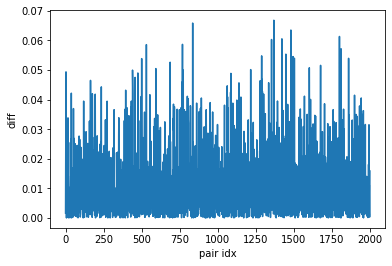

In [147]:
plt.plot(range(2000),diff)
plt.ylabel("diff")
plt.xlabel("pair idx")

### $\rho_{i}^{\otimes 3}$

In [148]:
rho2i = cg_increment(rho1i, rho1i, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])
rho3i = cg_increment(rho2i, rho1i, clebsch_gordan=cg, lcut=0, other_keys_match=["species_center"])
# rho4i = cg_increment(rho3i, rho1i, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])
# rho5i = cg_increment(rho4i, rho1i, clebsch_gordan=cg, lcut=0, other_keys_match=["species_center"])

In [149]:
xx =  cg_increment(rho1i, rho1i, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])
for k, b in rho2i: 
    nu, s, l, spa = k
    idx = xx.blocks_matching(inversion_sigma=s, spherical_harmonics_l=l)[0]
    xblock = xx.block(idx)
    print(k, np.linalg.norm(b.values-xblock.values))

(2, 1, 0, 5) 0.0
(2, 1, 1, 5) 0.0
(2, 1, 2, 5) 0.0
(2, 1, 3, 5) 0.0
(2, -1, 1, 5) 0.0
(2, -1, 2, 5) 0.0
(2, -1, 3, 5) 0.0


In [37]:
rhoii1i2_nu0 = cg_combine(gij, gij, clebsch_gordan=cg, other_keys_match=['species_center'], lcut=3)
rhoii1i2_nu1 =  cg_combine(rho1i, rhoii1i2_nu0, clebsch_gordan=cg, other_keys_match = ['species_center'], lcut=0)

KeyboardInterrupt: 

### check map between three center and single center 

In [397]:
rho2i_full = cg_combine(rho1i, rho1i, clebsch_gordan=cg, lcut=3, sorted_l=False)
test = operations.sum_over_samples(rhoii1i2_nu0, samples_names=["neighbor_1", "neighbor_2"]) 

In [398]:
np.linalg.norm(rho2i_full.block(2).values/test.block(2).values-1)

2.3955878289546457e-12

### check degeneracy of $\rho_{i}^{\otimes 3}$

In [15]:
np.linalg.norm(rho3i.block(spherical_harmonics_l=0,inversion_sigma=1 ).values[0] - rho3i.block(spherical_harmonics_l=0,inversion_sigma=1 ).values[1])


1.7279430568860854e-17

In [14]:
# rhoii1i2_nu1.keys_to_properties('species_neighbor_1')
# rhoii1i2_nu1.keys_to_properties('species_neighbor_2')

In [16]:
rhoii1i2_nu1.block(inversion_sigma=1).samples[:64]#values.shape


Labels([(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3),
        (0, 0, 0, 4), (0, 0, 0, 5), (0, 0, 0, 6), (0, 0, 0, 7),
        (0, 0, 1, 0), (0, 0, 1, 1), (0, 0, 1, 2), (0, 0, 1, 3),
        (0, 0, 1, 4), (0, 0, 1, 5), (0, 0, 1, 6), (0, 0, 1, 7),
        (0, 0, 2, 0), (0, 0, 2, 1), (0, 0, 2, 2), (0, 0, 2, 3),
        (0, 0, 2, 4), (0, 0, 2, 5), (0, 0, 2, 6), (0, 0, 2, 7),
        (0, 0, 3, 0), (0, 0, 3, 1), (0, 0, 3, 2), (0, 0, 3, 3),
        (0, 0, 3, 4), (0, 0, 3, 5), (0, 0, 3, 6), (0, 0, 3, 7),
        (0, 0, 4, 0), (0, 0, 4, 1), (0, 0, 4, 2), (0, 0, 4, 3),
        (0, 0, 4, 4), (0, 0, 4, 5), (0, 0, 4, 6), (0, 0, 4, 7),
        (0, 0, 5, 0), (0, 0, 5, 1), (0, 0, 5, 2), (0, 0, 5, 3),
        (0, 0, 5, 4), (0, 0, 5, 5), (0, 0, 5, 6), (0, 0, 5, 7),
        (0, 0, 6, 0), (0, 0, 6, 1), (0, 0, 6, 2), (0, 0, 6, 3),
        (0, 0, 6, 4), (0, 0, 6, 5), (0, 0, 6, 6), (0, 0, 6, 7),
        (0, 0, 7, 0), (0, 0, 7, 1), (0, 0, 7, 2), (0, 0, 7, 3),
        (0, 0, 7, 4), (0, 0, 7, 5), (0, 

In [17]:
np.linalg.norm(rhoii1i2_nu1.block(inversion_sigma=1 ).values[:64])

0.1273083301388986

In [18]:
# diff = np.sum(rhoii1i2_nu1.block(species_center = 6).values[:64], axis=0) - np.sum(rhoii1i2_nu1.block(species_center = 6).values[64:], axis=0)
diff = rhoii1i2_nu1.block(inversion_sigma=1).values[:64] - rhoii1i2_nu1.block(inversion_sigma=1).values[64:128]

np.linalg.norm(diff)

0.06589105111408992

In [19]:
# from equistore import operations
# ntrain = 400
# train_tmap = operations.slice(rhoii1i2_nu1, 
#                 samples = Labels(
#             names=["structure"],
#             values=np.array(
#                 list(range(ntrain))
#             ).reshape(-1,1), )
#                 )

# test_tmap = operations.slice(rhoii1i2_nu1, 
#                 samples = Labels(
#             names=["structure"],
#             values=np.array(
#                 list(range(ntrain, 500))
#             ).reshape(-1,1), )
#                 )

# from equistore.io import save, load
# # save('./rho3i_400.npz', rh)
# save('./rhoii1i2n1_400.npz', train_tmap)
# save('./rhoii1i2n1_400-500.npz', test_tmap)

/Users/jigyasa/miniconda3/lib/python3.8/site-packages/equistore/operations/slice.py:113: UserWarning: Some TensorBlocks in the sliced TensorMap are now empty, based on your choice of samples and/or properties to slice by. The keys of the empty TensorBlocks are:
 [(3, 1, 0,  1,  1, 12) (3, 1, 0,  1,  3, 12) (3, 1, 0,  1, 12,  1)
 (3, 1, 0,  1, 12,  3) (3, 1, 0,  1, 12, 12) (3, 1, 0,  3,  1, 12)
 (3, 1, 0,  3,  3, 12) (3, 1, 0,  3, 12,  1) (3, 1, 0,  3, 12,  3)
 (3, 1, 0,  3, 12, 12) (3, 1, 0, 12,  1,  1) (3, 1, 0, 12,  1,  3)
 (3, 1, 0, 12,  1, 12) (3, 1, 0, 12,  3,  1) (3, 1, 0, 12,  3,  3)
 (3, 1, 0, 12,  3, 12) (3, 1, 0, 12, 12,  1) (3, 1, 0, 12, 12,  3)]
  warnings.warn(


### artificial structure

In [372]:
from generate_bispectrum_structures import * 
from ase import Atoms

In [373]:
center_species = ring_species= z2species ='B'
n=2

phi1 = np.pi/4 #np.random.uniform(np.pi/6, np.pi)
phi2 = -np.pi/3 #np.random.uniform(np.pi/6, np.pi)
r=2
z1=0
z2 = 4
layer1 = points_on_circle(r,[phi1,phi2])

positions = np.zeros((4,3))
positions[1:3,:2] = layer1
positions[1:3, 2] = z1
# positions[1,:2] = [0,0]
positions[3,:2] = [np.random.uniform(0.2,1.2),np.random.uniform(0.2,1.2)]
positions[3, 2] =z2


atom_string = center_species + ring_species*(n) + z2species
atoms = Atoms(atom_string, positions=positions[:], pbc=False)

positions2 = positions.copy()
positions2[2:4, 0] = -positions[2:4,0]
positions2[2:4, 1] = positions[2:4, 1]
atoms2 = Atoms(atom_string, positions=positions2[:], pbc=False)

positions3 = positions.copy()
positions3[3,2]=-4
atoms3 = Atoms(atom_string, positions=positions3[:], pbc=False)

In [374]:
print(atoms.get_all_distances() )

# print(atoms2.get_all_distances() ) # is equal to atoms when the first two atoms are non complanar with the origin

print(atoms3.get_all_distances()) # inverter structure basically 

[[0.         2.         2.         4.13338024]
 [2.         0.         3.17341336 4.11323662]
 [2.         3.17341336 0.         4.71064777]
 [4.13338024 4.11323662 4.71064777 0.        ]]
[[0.         2.         2.         4.13338024]
 [2.         0.         3.17341336 4.11323662]
 [2.         3.17341336 0.         4.71064777]
 [4.13338024 4.11323662 4.71064777 0.        ]]


In [375]:
view([atoms, atoms3])

In [376]:
artificial = [atoms, atoms3] #atoms2
calculator = SphericalExpansion(**hypers)
ar_rhoi = calculator.compute(artificial)
ar_rhoi = ar_rhoi.keys_to_properties(['species_neighbor'])
ar_rho1i = acdc_standardize_keys(ar_rhoi)
# selects only one environment
ar_rho1i = operations.slice(ar_rho1i, samples=Labels(['center'],np.array([[0]], np.int32)) )
# norm_rho1 = np.sqrt(np.sum([(b.values**2).sum(axis=(1,2)) for b in rho1i.blocks()],axis=0).mean())
# for b in rho1i.blocks():
#     b.values[:]/=norm_rho1
ar_rho2i = cg_increment(ar_rho1i, ar_rho1i, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])
ar_rho3i = cg_increment(ar_rho2i, ar_rho1i, clebsch_gordan=cg, lcut=0, other_keys_match=["species_center"])  

calculator = PairExpansion(**hypers)
ar_gij = calculator.compute(artificial)
ar_gij = operations.slice(ar_gij, samples=Labels(['first_atom'],np.array([[0]], np.int32)) )
ar_gij =  acdc_standardize_keys(ar_gij)
# for b in gij.blocks():
#     b.values[:]/=norm_rho1
ar_gij = simplify_gij(ar_gij)
ar_rhoii1i2_nu0 = cg_combine(ar_gij, ar_gij, clebsch_gordan=cg, other_keys_match=['species_center'], lcut=3)
ar_rhoii1i2_nu1 =  cg_combine(ar_rho1i, ar_rhoii1i2_nu0, clebsch_gordan=cg, other_keys_match = ['species_center'], lcut=0)


In [377]:
ar_rhoii1i2_nu1.block(inversion_sigma=-1).values.squeeze()[:16] -ar_rhoii1i2_nu1.block(inversion_sigma=-1).values.squeeze()[16:32]


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-3.70477971e-06, -2.94558474e-04, -4.58446563e-07, ...,
         3.16165055e-05,  4.93809604e-08,  3.93677329e-06],
       [ 3.70477971e-06,  2.94558474e-04,  4.58446563e-07, ...,
        -3.16165055e-05, -4.93809604e-08, -3.93677329e-06],
       [-8.78154690e-25,  5.62335965e-23, -6.35203908e-23, ...,
        -1.60461975e-23,  3.18368910e-23, -8.55700383e-22]])

In [380]:
np.where((ar_rho3i.block(inversion_sigma = -1).values[0] - ar_rho3i.block(inversion_sigma = -1).values[1])>1e-7)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([10, 11, 20, 21, 25, 29, 33, 35, 42, 46, 52, 53]))

## encoder-decoder

encode three center features, sum over i1,i2 and then decode 

In [18]:
import torch
def StructureMap(samples_structure, device="cpu"):
    unique_structures, unique_structures_idx = np.unique(
        samples_structure, return_index=True
    )
    new_samples = samples_structure[np.sort(unique_structures_idx)]
    # we need a list keeping track of where each atomic contribution goes
    # (e.g. if structure ids are [3,3,3,1,1,1,6,6,6] that will be stored as
    # the unique structures [3, 1, 6], structure_map will be
    # [0,0,0,1,1,1,2,2,2]
    replace_rule = dict(zip(unique_structures, range(len(unique_structures))))
    structure_map = torch.tensor(
        [replace_rule[i] for i in samples_structure],
        dtype=torch.long,
        device=device,
    )
    return structure_map, new_samples, replace_rule

In [19]:
def get_triple_samples(bsamples, train_idx):
    samples = []
    for i in trainidx:
        loc = np.where(bsamples["structure"] == i)
        samples.append(bsamples[loc].asarray())
    return Labels(rhoii1i2_nu1.sample_names, np.asarray(np.concatenate(samples), dtype=np.int32))

In [20]:
device='cpu'
torch.set_default_dtype(torch.float64)

In [53]:
class BlockEncoderDecoder(torch.nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encode_type = kwargs['encode_type']
        
        if self.encode_type == 'linear':
            self.encoder_output_layer = torch.nn.Linear(
            in_features=kwargs["input_size"], out_features=kwargs["intermediate_size"]
        )
        
        else: 
            self.encoder_hidden_layer = torch.nn.Linear(
                in_features=kwargs["input_size"], out_features=kwargs["hidden_size"]
            )
            
            self.encoder_output_layer = torch.nn.Linear(
                in_features=kwargs["hidden_size"], out_features=kwargs["intermediate_size"]
            )
        
#             self.encoder_hidden_layer.weight.data.fill_(0)
#             self.encoder_hidden_layer.bias.data.fill_(0)

#         self.encoder_output_layer.weight.data.fill_(0)
#         self.encoder_output_layer.bias.data.fill_(0)

        
        self.decoder_hidden_layer = torch.nn.Linear(
            in_features=kwargs["intermediate_size"], out_features=kwargs["hidden_size"]
        )
#         self.decoder_hidden_layer.weight.data.fill_(0)
#         self.decoder_hidden_layer.bias.data.fill_(0)
        
        if 'output_size' in kwargs: 
            self.decoder_output_layer = torch.nn.Linear(
            in_features=kwargs["hidden_size"], out_features=kwargs["output_size"]
        )
        else: 
            self.decoder_output_layer = torch.nn.Linear(
            in_features=kwargs["hidden_size"], out_features=kwargs["input_size"]
            )
#         self.decoder_output_layer.weight.data.fill_(0)
#         self.decoder_output_layer.bias.data.fill_(0)
        self.sum_triples=None
        self.samples = kwargs["triple_samples"]
        self.to(device)
        
        
    
    def structure_wise_feats(self, x): 
        if self.encode_type == 'linear': 
#             x = torch.from_numpy(x)
            encoded = self.encoder_output_layer(x)
#             print("encoded_shape", encoded.shape)
        
        else: 
#             x = torch.from_numpy(x.values)
            encoded = self.encoder_hidden_layer(x)
            activation = torch.tanh(encoded)
            encoded = self.encoder_output_layer(activation)
            encoded = torch.tanh(encoded)
#             print("encoded_shape", encoded.shape)
        
        structure_map, new_samples, _ = StructureMap(
            self.samples["structure"], "cpu"
        )
        self.sum_triples =  torch.zeros((len(new_samples), encoded.shape[-1]), device=x.device)
        self.sum_triples.index_add_(0, structure_map, encoded)
        
        return self.sum_triples
    
    def forward(self, x):
#         print("from block forward", x.keys)
        activation = self.decoder_hidden_layer(x)
        activation = torch.tanh(activation)
        activation = self.decoder_output_layer(activation)
        decoded = torch.tanh(activation)
#         print("decoded_shape", decoded.shape)
        return decoded
    

# class ThreeCenterModel(torch.nn.ModuleDict):
    
#     def __init__(self, feature, train_idx, hidden_size=128, intermediate_size=128, encode_type='linear'):
#         super().__init__()
#         self.feature = feature
#         self.encode_type=encode_type
#         self.models = torch.nn.ModuleDict()
#         self.trainidx = train_idx #idx of train structures
#         for k, b in self.feature:
#             input_size = b.values.shape[-1]
#             print(k,input_size, hidden_size, intermediate_size)
# #             samples = get_triple_samples(b.samples, self.trainidx)
#             self.models[str(k)] = BlockEncoderDecoder(input_size=input_size, hidden_size=hidden_size, intermediate_size=intermediate_size, 
#                                                       encode_type=self.encode_type, triple_samples = b.samples
#                                                      )            
        
#         self.to(device)
    
#     def forward(self, feature):
#         pred_blocks =[]
#         for k, block in feature:

#             struct_feat = self.models[str(k)].structure_wise_feats(block.values.squeeze())
#             structure_map, new_samples, _ = StructureMap(block.samples["structure"], device)
        
#             recons = self.models[str(k)].forward(struct_feat) 
# #             print(k, recons.shape,recons.reshape((recons.shape[0], recons.shape[1], 1)).swapaxes(1,-1).shape)
# #         return recons
#             newblock = TensorBlock(
#                         values=recons,#.reshape((recons.shape[0], recons.shape[1], 1)).swapaxes(1,-1),
#                         samples=Labels(["structure"], new_samples.asarray()),
#                         components=[],#block.components,
#                         properties= Labels(["prop"], np.asarray([i for i in range(recons.shape[1])], dtype=np.int32).reshape(-1,1))
#                     )
#             pred_blocks.append(newblock) 
        
#         keys = feature.keys
#         pred_target = TensorMap(keys, pred_blocks)
#         return(pred_target)
    
    


### tensormap of reconstructed features

In [618]:
model = ThreeCenterModel(rhoii1i2_nu1, train_idx = [0,1,3,5], encode_type='linear')

(3, 1, 0, 5, 5, 5) 184 128 128
(3, -1, 0, 5, 5, 5) 88 128 128


In [619]:
model(rhoii1i2_nu1)

encoded_shape torch.Size([640, 128])
decoded_shape torch.Size([10, 184])
[(0,) (1,) (2,) (3,) (4,) (5,) (6,) (7,) (8,) (9,)]
encoded_shape torch.Size([640, 128])
decoded_shape torch.Size([10, 88])
[(0,) (1,) (2,) (3,) (4,) (5,) (6,) (7,) (8,) (9,)]


TensorMap with 2 blocks
keys: ['order_nu' 'inversion_sigma' 'spherical_harmonics_l' 'species_center' 'species_neighbor_a' 'species_neighbor_b']
           3             1                    0                   5                 5                   5
           3            -1                    0                   5                 5                   5

### train different blocks separately 

In [23]:
allidx = range(1000*2)

trainidx = range(900*2)
testidx = list(set(allidx).difference(trainidx))

In [24]:
block = rhoii1i2_nu1.block(0)

In [25]:
target = torch.from_numpy(rho3i.block(spherical_harmonics_l = 0, inversion_sigma = 1).values.squeeze())

In [35]:
input_size = block.values.shape[-1]
hidden_size = 256
intermediate_size = 256
encode_type = 'linear'
output_size = target.shape[-1]
model_block = BlockEncoderDecoder(input_size=input_size, hidden_size=hidden_size, 
                                  intermediate_size=intermediate_size, encode_type=encode_type, 
                                  triple_samples = block.samples, output_size = output_size
                                
                                                     )            
struct_feat = model_block.structure_wise_feats(block.values.squeeze())        
recons = model_block.forward(struct_feat) 
            

In [43]:
def mse_loss(pred, target):
    return torch.sum((pred - target)**2)
#     return torch.sum((pred.flatten() - target.flatten())**2)


In [44]:
optimizer = torch.optim.LBFGS(
        model_block.parameters(),
        lr=0.1,
        line_search_fn="strong_wolfe",
        history_size=256,
    )

In [45]:
nepochs = 200

for epoch in range(nepochs):
    
    def single_step():
        optimizer.zero_grad()
        loss = torch.zeros(size=(1,), device=device)
        struct_feat = model_block.structure_wise_feats(block.values.squeeze())
        predicted = model_block(struct_feat)
        loss += mse_loss(predicted[trainidx], target[trainidx])
        
        loss.backward(retain_graph=False)
        return loss

    loss = optimizer.step(single_step)
#     print(loss)
    struct_feat = model_block.structure_wise_feats(block.values.squeeze())
    predicted = model_block(struct_feat) #, triplet_samples["structure"][ntrain*ntriples:])
    
#     if epoch % 5 ==0:
    print("Epoch:", epoch, "RMSE: train ", np.sqrt(loss.detach().numpy().flatten()[0]/len(trainidx)),
     "test", np.sqrt(mse_loss(predicted[testidx], target[testidx]).detach().numpy().flatten()[0]/ len(testidx))
         )

Epoch: 0 RMSE: train  1.2078184157107028 test 0.9727308204177948
Epoch: 1 RMSE: train  0.9731485804210459 test 0.7692942280219645
Epoch: 2 RMSE: train  0.770147507949278 test 0.2847334423761676
Epoch: 3 RMSE: train  0.2865970419606375 test 0.14087041917183318
Epoch: 4 RMSE: train  0.14446736011405278 test 0.11320443720198393
Epoch: 5 RMSE: train  0.11756347045338822 test 0.11064958746615841
Epoch: 6 RMSE: train  0.11509898410377417 test 0.11039847276633045
Epoch: 7 RMSE: train  0.11484233699679829 test 0.11037124632240176
Epoch: 8 RMSE: train  0.11481654067636674 test 0.11024008951556771
Epoch: 9 RMSE: train  0.11472384406153432 test 0.10987559853512133
Epoch: 10 RMSE: train  0.11444277692705115 test 0.1095878419328224
Epoch: 11 RMSE: train  0.11418669370825606 test 0.10428237507747087
Epoch: 12 RMSE: train  0.10872352098736617 test 0.10337243379980307
Epoch: 13 RMSE: train  0.10778196491575308 test 0.10336101489443934
Epoch: 14 RMSE: train  0.10773998067535014 test 0.1033271206582616


KeyboardInterrupt: 

In [682]:
block = rhoii1i2_nu1.block(0)
trainidx = [0,3,5]
bsamples = block.samples

In [547]:
new_samples = StructureMap(rhoii1i2_nu1.block(0).samples[:128]["structure"])[1]

In [87]:
len(rho2i)

7

In [90]:
npca = 8
npca= [npca]*len(rho1i)

## NICE like feature reduction

In [6]:
from equistore.io import load,save
from rascaline import SphericalExpansion
from rascaline import SphericalExpansionByPair as PairExpansion
from equistore import operations

In [7]:
frames = read('/home/nigam/scratch/equistore-examples/data/three_center/boron/boron8_4000_pbeccpvdz.xyz', ':1000')
# frames = read('/Users/jigyasa/scratch/equistore-examples/data/three_center/boron/boron8_4000_pbeccpvdz.xyz', ':500')

In [8]:
hypers = {
    "cutoff": 2.5,
    "max_radial": 8,
    "max_angular": 6,
    "atomic_gaussian_width": 0.2,
    "radial_basis": {"Gto": {}},
    "cutoff_function": {"ShiftedCosine": {"width": 0.1}},
    "center_atom_weight": 0.0,    
}
cg = ClebschGordanReal(6)

calculator = SphericalExpansion(**hypers)
rhoi = calculator.compute(frames)
rhoi = rhoi.keys_to_properties(['species_neighbor'])
rho1i = acdc_standardize_keys(rhoi)
    


# selects only one environment
rho1i = operations.slice(rho1i, samples=Labels(['center'],np.array([[0]], np.int32)) )
# norm_rho1 = np.sqrt(np.sum([(b.values**2).sum(axis=(1,2)) for b in rho1i.blocks()],axis=0).mean())
# for b in rho1i.blocks():
#     b.values[:]/=norm_rho1
    

# calculator = PairExpansion(**hypers)
# gij = calculator.compute(frames)
# gij = operations.slice(gij, samples=Labels(['first_atom'],np.array([[0]], np.int32)) )
# gij =  acdc_standardize_keys(gij)
## for b in gij.blocks():
##     b.values[:]/=norm_rho1
## gij = simplify_gij(gij)

In [126]:
# save('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho1i', rho1i )

In [9]:
import scipy
def compute_rhoi_pca(rhoi, npca):
    from scipy.sparse.linalg import svds
    """ computes PCA contraction with combined elemental and radial channels.
    returns the contraction matrices
    """
    if isinstance(npca, list): 
        assert len(npca) == len(rhoi)
    else: 
        npca = [npca]*len(rhoi)
    pca_vh_all = []
    s_sph_all = []
    pca_blocks = []
    for idx, (key, block) in enumerate(rhoi):
        nu, sigma, l, spi = key
        xl = block.values.reshape((len(block.samples)*len(block.components[0]),-1))
#         print(xl.shape)
        u, s, vt = svds(xl, k=(min(min(xl.shape)-1,npca[idx]*2)), return_singular_vectors='vh')
#          k=(min(xl.shape)-1)
#         k=(min(min(xl.shape)-1,npca*2))
        s_sph_all.append(s[::-1])
        pca_vh_all.append(vt[-npca[idx]:][::-1].T)
#         print(s.shape, vt.shape)
        print("singular values", s[::-1][:npca[idx]]/s[::-1][0])
        pblock = TensorBlock( values = vt[-npca[idx]:][::-1].T ,
                                 components = [],
                                 samples = Labels(["pca"], np.asarray([i for i in range(len(block.properties))], dtype=np.int32).reshape(-1,1)),
                                 properties = Labels(["pca"], np.asarray([i for i in range(vt[-npca[idx]:][::-1].T.shape[-1])], dtype=np.int32).reshape(-1,1))
                                )
        pca_blocks.append(pblock)
    pca_tmap = TensorMap(rhoi.keys, pca_blocks)
    return pca_tmap, pca_vh_all, s_sph_all


def apply_pca(rhoi, pca_tmap):
    new_blocks = []
    for idx, (key, block) in enumerate(rhoi):
        nu, sigma, l, spi = key
        xl = block.values.reshape((len(block.samples)*len(block.components[0]),-1))
        vt = pca_tmap.block(spherical_harmonics_l = l, inversion_sigma = sigma).values
        xl_pca = (xl@vt).reshape((len(block.samples),len(block.components[0]),-1))
#         print(xl_pca.shape)
        pblock = TensorBlock( values = xl_pca,
                                 components = block.components,
                                 samples = block.samples,
                                 properties = Labels(["pca"], np.asarray([i for i in range(xl_pca.shape[-1])], dtype=np.int32).reshape(-1,1))
                                )
        new_blocks.append(pblock)
    pca_tmap = TensorMap(rhoi.keys, new_blocks)
    return pca_tmap


In [10]:
rho2i = cg_increment(rho1i, rho1i, clebsch_gordan=cg, lcut=5, other_keys_match=["species_center"])

In [11]:
rho2i_forpca = operations.slice(rho2i, samples=Labels(['structure'],np.array(list(range(0,5000,4)), np.int32).reshape(-1,1)) )


In [12]:
rho2i_projection, rho2i_vh_blocks, rho2i_eva_blocks = compute_rhoi_pca(rho2i_forpca, npca=[45,65,75,75,90,80,80,80,65,70,70])

singular values [1.00000000e+00 3.04561725e-01 1.56202486e-01 1.48884216e-01
 1.04392671e-01 8.96771498e-02 6.65633267e-02 6.19950991e-02
 5.67185493e-02 4.89345492e-02 3.47654557e-02 2.95186412e-02
 2.16896456e-02 1.85815079e-02 1.37933317e-02 1.12667004e-02
 1.03319804e-02 9.28395591e-03 8.31485059e-03 6.64874248e-03
 5.47461131e-03 4.85852469e-03 3.44639286e-03 2.79207108e-03
 2.26513061e-03 1.75203569e-03 1.67457027e-03 1.30087967e-03
 1.09157489e-03 9.61723950e-04 7.63081074e-04 5.33779620e-04
 4.28395970e-04 3.25676813e-04 2.94290174e-04 2.67307197e-04
 2.13696636e-04 1.85332200e-04 1.64869329e-04 1.35545922e-04
 1.20551653e-04 1.12022984e-04 8.87347560e-05 7.00979410e-05
 5.35350180e-05]
singular values [1.00000000e+00 3.88285509e-01 3.16795288e-01 3.06876401e-01
 2.42511594e-01 2.13427162e-01 2.03866063e-01 1.15566360e-01
 1.01235875e-01 8.57206132e-02 7.55720988e-02 6.62516724e-02
 6.43083315e-02 5.42034828e-02 5.07349832e-02 4.76013808e-02
 3.00342834e-02 2.72568100e-02 2.564

singular values [1.00000000e+00 7.98902467e-01 6.97615896e-01 5.54310273e-01
 4.00430990e-01 2.99577100e-01 2.80813875e-01 2.55538357e-01
 2.35763136e-01 1.98519419e-01 1.93917851e-01 1.65000261e-01
 1.23866450e-01 1.02936273e-01 9.71342229e-02 6.98447433e-02
 6.76086885e-02 6.71146679e-02 5.81117377e-02 4.62834440e-02
 3.69005156e-02 3.54772438e-02 3.32406058e-02 2.85240126e-02
 2.68826950e-02 2.46121270e-02 2.10968905e-02 1.87556374e-02
 1.80700102e-02 1.52161016e-02 1.33285859e-02 1.14211002e-02
 1.03168020e-02 9.83043612e-03 9.76021324e-03 8.65068641e-03
 8.34697510e-03 7.84896785e-03 7.69069606e-03 6.91968131e-03
 6.72864586e-03 4.10702037e-03 3.16176464e-03 2.90535600e-03
 2.84951916e-03 2.84367902e-03 2.54880023e-03 2.42431729e-03
 2.28694125e-03 2.13736247e-03 2.12834278e-03 2.03485497e-03
 1.63082282e-03 1.50183782e-03 1.49217576e-03 1.21626238e-03
 1.17171031e-03 9.81615455e-04 9.03963969e-04 8.53867233e-04
 8.27007824e-04 7.67846338e-04 7.44402332e-04 7.02495035e-04
 6.46524

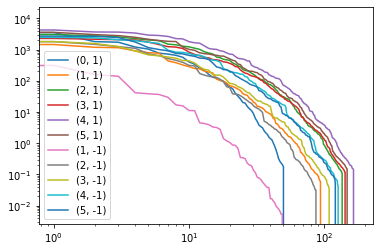

In [13]:
for i in range(len(rho2i_eva_blocks)):
    plt.loglog(rho2i_eva_blocks[i]*1e3, label = (rho2i.keys[i]["spherical_harmonics_l"],rho2i.keys[i]["inversion_sigma"] ))
plt.legend()

In [15]:
rho2i_pca= apply_pca(rho2i, rho2i_projection)
# save('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho2i', rho2i )
# save('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho2i_pca', rho2i_pca )

In [16]:
rho3i = cg_increment(rho2i_pca, rho1i, clebsch_gordan=cg, lcut=4, other_keys_match=["species_center"])

In [17]:
rho3i_forpca = operations.slice(rho3i, samples=Labels(['structure'],np.array(list(range(0,500,4)), np.int32).reshape(-1,1)) )


In [19]:
rho3i_forpca

TensorMap with 10 blocks
keys: ['order_nu' 'inversion_sigma' 'spherical_harmonics_l' 'species_center']
           3             1                    0                   5
           3             1                    1                   5
           3             1                    2                   5
           3             1                    3                   5
           3             1                    4                   5
           3            -1                    1                   5
           3            -1                    2                   5
           3            -1                    3                   5
           3            -1                    4                   5
           3            -1                    0                   5

In [20]:
rho3i_projection, rho3i_vh_blocks, rho3i_eva_blocks = compute_rhoi_pca(rho3i_forpca, npca=[3000,4600,5545,5600, 5580,3600,3560,4000,3000,200])

singular values [1.00000000e+00 3.75280391e-01 2.17301280e-01 1.59623960e-01
 1.46145507e-01 1.12015010e-01 1.01519563e-01 9.16224666e-02
 8.89050952e-02 6.33240611e-02 5.78411830e-02 5.25361547e-02
 4.75709227e-02 4.18689742e-02 3.92024732e-02 3.36970155e-02
 3.26541123e-02 3.18654704e-02 2.76298876e-02 2.73651324e-02
 2.59440094e-02 2.38006789e-02 2.29584028e-02 2.08871903e-02
 1.97697721e-02 1.83296343e-02 1.78360984e-02 1.66546397e-02
 1.58315126e-02 1.54324466e-02 1.54073193e-02 1.45880036e-02
 1.33472103e-02 1.31345797e-02 1.26703543e-02 1.24738164e-02
 1.20993959e-02 1.15900461e-02 1.13242251e-02 1.06785536e-02
 9.80910218e-03 9.26894725e-03 9.09529071e-03 8.67165598e-03
 8.19683484e-03 7.85626339e-03 7.69725919e-03 7.27912241e-03
 6.93135604e-03 6.66844049e-03 6.29061183e-03 5.97598095e-03
 5.70151765e-03 5.42353536e-03 5.34032104e-03 5.15369556e-03
 4.89331366e-03 4.80725586e-03 4.50604293e-03 4.37243132e-03
 4.33205589e-03 4.01501843e-03 3.83429914e-03 3.54480887e-03
 3.48673

singular values [1.00000000e+00 3.60633214e-01 3.02032903e-01 2.87523045e-01
 2.75030478e-01 2.23121703e-01 1.98828638e-01 1.90287198e-01
 1.71607498e-01 1.69717568e-01 1.62729502e-01 1.50529174e-01
 1.35593547e-01 1.30104592e-01 1.25682196e-01 1.19152421e-01
 1.15148772e-01 1.13960688e-01 1.11503652e-01 1.09100534e-01
 1.06072202e-01 1.05126561e-01 1.03596031e-01 9.87784934e-02
 9.68845656e-02 9.58457839e-02 9.52964894e-02 9.26532259e-02
 9.20764480e-02 8.84388205e-02 8.59449424e-02 8.37279917e-02
 8.21816500e-02 8.18962586e-02 8.08964445e-02 7.91423066e-02
 7.76088554e-02 7.68296960e-02 7.47728120e-02 7.36878646e-02
 7.35204913e-02 7.19445755e-02 7.08550566e-02 6.93121520e-02
 6.78543084e-02 6.69532680e-02 6.51127260e-02 6.41857848e-02
 6.30046132e-02 6.22820627e-02 6.02969896e-02 6.00457669e-02
 5.98467149e-02 5.84823570e-02 5.80481745e-02 5.77272743e-02
 5.61982411e-02 5.52147969e-02 5.48327493e-02 5.42492399e-02
 5.40269765e-02 5.29705002e-02 5.25049124e-02 5.20262355e-02
 5.07464

singular values [1.         0.45223864 0.40290017 ... 0.         0.         0.        ]
singular values [1.00000000e+00 9.35403153e-01 8.96048998e-01 7.51457061e-01
 7.25074475e-01 6.63611578e-01 6.30523991e-01 6.06120262e-01
 5.53088307e-01 5.23297932e-01 5.09875911e-01 4.65663228e-01
 4.41228102e-01 4.29170205e-01 4.05317459e-01 4.01847328e-01
 3.90013873e-01 3.85166130e-01 3.69066642e-01 3.50262160e-01
 3.41284624e-01 3.39042222e-01 3.23065696e-01 3.13207498e-01
 2.97842357e-01 2.90760389e-01 2.81049892e-01 2.71912978e-01
 2.67684721e-01 2.51779748e-01 2.44680702e-01 2.38818674e-01
 2.36709734e-01 2.25152773e-01 2.20362526e-01 2.10300036e-01
 1.96060933e-01 1.95275073e-01 1.93133552e-01 1.84548766e-01
 1.76965104e-01 1.74054652e-01 1.68584251e-01 1.63697165e-01
 1.59514172e-01 1.51593915e-01 1.47464894e-01 1.46621582e-01
 1.40733107e-01 1.35954590e-01 1.34353704e-01 1.29864908e-01
 1.27790433e-01 1.22537460e-01 1.21894747e-01 1.20086259e-01
 1.18243395e-01 1.13634506e-01 1.12661024e

singular values [1.00000000e+00 6.54620403e-01 6.20346024e-01 5.78079983e-01
 5.20458476e-01 4.66639389e-01 4.46382291e-01 3.97458640e-01
 3.71562497e-01 3.53935490e-01 3.45124743e-01 3.31710821e-01
 3.28421719e-01 3.10224734e-01 3.03332222e-01 2.95103469e-01
 2.88542253e-01 2.81316562e-01 2.76730038e-01 2.69760121e-01
 2.56858897e-01 2.51919154e-01 2.46808380e-01 2.44309387e-01
 2.37163511e-01 2.35543329e-01 2.31836985e-01 2.25610677e-01
 2.20436859e-01 2.13161770e-01 2.12644372e-01 2.08358302e-01
 1.99529183e-01 1.98223243e-01 1.92718962e-01 1.89204208e-01
 1.83453227e-01 1.81528154e-01 1.78821789e-01 1.72826422e-01
 1.68283304e-01 1.66862522e-01 1.64066260e-01 1.61886249e-01
 1.55699843e-01 1.53600220e-01 1.51318402e-01 1.49839966e-01
 1.45656129e-01 1.44314908e-01 1.40744705e-01 1.38871176e-01
 1.37057645e-01 1.35512052e-01 1.35149929e-01 1.31885094e-01
 1.31338706e-01 1.27495478e-01 1.26607087e-01 1.22960894e-01
 1.22182690e-01 1.20613057e-01 1.18106399e-01 1.15238066e-01
 1.14768

singular values [1.         0.88386067 0.7995756  ... 0.         0.         0.        ]
singular values [1.00000000e+00 7.53359851e-01 4.68158954e-01 4.59238765e-01
 4.01709717e-01 3.50595139e-01 3.25345977e-01 2.97184055e-01
 2.61664405e-01 2.20998587e-01 2.08093725e-01 1.95955410e-01
 1.59527077e-01 1.44053392e-01 1.33858463e-01 1.16732118e-01
 1.07826823e-01 9.98452078e-02 9.08083083e-02 7.80150344e-02
 7.12587125e-02 5.98642450e-02 5.33419613e-02 4.94756744e-02
 4.62505434e-02 4.09264772e-02 3.81648105e-02 3.30757699e-02
 3.05447772e-02 2.79334892e-02 2.66379244e-02 2.40380888e-02
 2.33428570e-02 2.23686720e-02 2.10567242e-02 1.99030784e-02
 1.82156529e-02 1.63481293e-02 1.54309953e-02 1.38706385e-02
 1.36232558e-02 1.20800401e-02 1.15654332e-02 1.06066671e-02
 1.02707188e-02 9.58510587e-03 8.75046707e-03 7.66588956e-03
 7.53708932e-03 6.55035245e-03 6.14349458e-03 5.85877332e-03
 5.42887218e-03 5.11646179e-03 4.86636714e-03 4.49618786e-03
 4.29705875e-03 3.70190832e-03 3.45570892e

In [22]:
rho3i_forpca[0].values.shape

(125, 1, 3440)

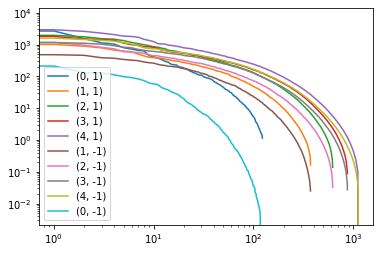

In [21]:
for i in range(len(rho3i_eva_blocks[:])): #8,12):#
    plt.loglog(rho3i_eva_blocks[i]*1e3, label = (rho3i.keys[i]["spherical_harmonics_l"],rho3i.keys[i]["inversion_sigma"] ))
plt.legend()

In [112]:
rho3i_pca= apply_pca(rho3i, rho3i_projection)
## save('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho3i', rho3i )
# save('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho3i_pca', rho3i_pca )

KeyboardInterrupt: 

In [124]:
rho3i.block(9).values.shape

(1000, 9, 10200)

In [114]:
rho3i_pca.block(0).values.shape

NameError: name 'rho3i_pca' is not defined

In [25]:
rho4i = cg_increment(rho3i_pca, rho1i, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])

In [26]:
rho4i_forpca = operations.slice(rho4i, samples=Labels(['structure'],np.array(list(range(0,500,4)), np.int32).reshape(-1,1)) )


In [27]:
rho4i_projection, rho4i_vh_blocks, rho4i_eva_blocks = compute_rhoi_pca(rho4i, npca=[150, 500, 400, 500, 500, 500, 600,120])

singular values [1.00000000e+00 3.20286983e-01 2.22179373e-01 1.24476406e-01
 9.47853467e-02 7.98778832e-02 6.05455319e-02 4.63613605e-02
 4.03792497e-02 3.30288103e-02 2.98592861e-02 2.73229206e-02
 2.07215783e-02 1.95001788e-02 1.85402433e-02 1.64200490e-02
 1.55591101e-02 1.37277460e-02 1.26197758e-02 1.18783544e-02
 1.14430031e-02 9.67171290e-03 9.64445748e-03 8.62741330e-03
 8.52193894e-03 7.44897602e-03 7.30295135e-03 6.84883888e-03
 6.45432787e-03 6.15067060e-03 5.81573572e-03 5.55867076e-03
 5.39294989e-03 4.90753786e-03 4.82384814e-03 4.72512310e-03
 4.46046621e-03 4.23328738e-03 3.88125706e-03 3.45218811e-03
 3.30756938e-03 3.20853197e-03 3.10979132e-03 2.99763075e-03
 2.72787736e-03 2.58169720e-03 2.47180212e-03 2.44292682e-03
 2.33952389e-03 2.25571587e-03 2.12925912e-03 2.04821200e-03
 1.95920400e-03 1.89392887e-03 1.84205131e-03 1.75023269e-03
 1.68402867e-03 1.63805970e-03 1.58464701e-03 1.48404753e-03
 1.39216970e-03 1.34209240e-03 1.30510377e-03 1.26453065e-03
 1.20379

singular values [1.00000000e+00 3.66555606e-01 3.58971807e-01 3.12733088e-01
 2.00814357e-01 1.77983240e-01 1.56136739e-01 1.31047499e-01
 1.15719495e-01 1.02534975e-01 9.23036796e-02 8.72067195e-02
 7.76072241e-02 6.76569293e-02 6.24488701e-02 5.85232354e-02
 5.70556009e-02 5.60473608e-02 5.13065186e-02 5.04876723e-02
 4.77424755e-02 4.57550130e-02 4.38458124e-02 4.15470722e-02
 3.79721636e-02 3.75024899e-02 3.57917918e-02 3.53925405e-02
 3.29982296e-02 3.20001632e-02 3.12788916e-02 3.09794629e-02
 2.96616259e-02 2.91501923e-02 2.74854727e-02 2.69692360e-02
 2.62059207e-02 2.50371056e-02 2.46629081e-02 2.34155056e-02
 2.32627826e-02 2.26785740e-02 2.19014580e-02 2.14507606e-02
 2.04764472e-02 2.00994260e-02 1.95898894e-02 1.83947394e-02
 1.78123837e-02 1.73928928e-02 1.72238481e-02 1.66783096e-02
 1.65986861e-02 1.59912722e-02 1.58197524e-02 1.52998405e-02
 1.52066830e-02 1.46431255e-02 1.45739423e-02 1.42952245e-02
 1.41879634e-02 1.37636262e-02 1.36956719e-02 1.33691859e-02
 1.31629

singular values [1.00000000e+00 7.33393331e-01 5.77062374e-01 5.14341843e-01
 4.89250056e-01 4.24629981e-01 3.35188289e-01 3.22165119e-01
 2.90473811e-01 2.78586063e-01 2.70328494e-01 2.29007404e-01
 2.24539953e-01 2.03899543e-01 1.83975004e-01 1.69361434e-01
 1.65224711e-01 1.56763032e-01 1.50351978e-01 1.41439036e-01
 1.39935649e-01 1.31842158e-01 1.30321803e-01 1.23717658e-01
 1.20653683e-01 1.13392860e-01 1.06095324e-01 1.01594038e-01
 9.97601312e-02 9.08054140e-02 8.69178381e-02 8.54519111e-02
 8.22727295e-02 7.94876881e-02 7.46033305e-02 7.32047203e-02
 6.86597286e-02 6.69675414e-02 6.43289032e-02 6.13955074e-02
 5.94488572e-02 5.71743708e-02 5.45201465e-02 5.24213332e-02
 5.01248256e-02 4.88254078e-02 4.76577420e-02 4.57796189e-02
 4.43076625e-02 4.32991907e-02 4.27136423e-02 4.04871992e-02
 3.97473058e-02 3.95847463e-02 3.86631368e-02 3.81224832e-02
 3.73273655e-02 3.55992538e-02 3.55139961e-02 3.33591953e-02
 3.28284358e-02 3.19630660e-02 3.02025940e-02 2.98571333e-02
 2.94181

singular values [1.00000000e+00 8.12528875e-01 5.37689412e-01 3.23253374e-01
 3.10774187e-01 2.92302137e-01 2.85675523e-01 2.67468537e-01
 2.59194791e-01 2.56876437e-01 2.49864060e-01 2.18549255e-01
 2.07512231e-01 1.98518019e-01 1.66560498e-01 1.61906788e-01
 1.42622716e-01 1.38021575e-01 1.30535756e-01 1.17863697e-01
 1.12220177e-01 1.05963563e-01 1.02321172e-01 9.88135452e-02
 9.46683514e-02 9.33758657e-02 8.98254950e-02 8.77927878e-02
 8.40608615e-02 8.25330099e-02 8.07499802e-02 7.82746269e-02
 7.67694095e-02 7.48928252e-02 7.28048994e-02 7.10016186e-02
 6.85278107e-02 6.64477902e-02 6.51326704e-02 6.34613626e-02
 6.29066688e-02 6.08263589e-02 5.91058690e-02 5.87965746e-02
 5.81462461e-02 5.59215450e-02 5.48426862e-02 5.27214343e-02
 5.11163606e-02 5.08238881e-02 4.86499137e-02 4.80894450e-02
 4.65359985e-02 4.49909493e-02 4.32944098e-02 4.30012818e-02
 4.25130305e-02 4.15692956e-02 3.91333553e-02 3.87653458e-02
 3.85744319e-02 3.81849589e-02 3.60828533e-02 3.54222365e-02
 3.45072

singular values [1.00000000e+00 5.71622973e-01 4.81622664e-01 4.24981242e-01
 3.46837886e-01 2.80165294e-01 1.75046086e-01 1.42831730e-01
 1.23368891e-01 1.02719836e-01 8.66331586e-02 8.17300590e-02
 6.71848219e-02 5.65061194e-02 5.10329190e-02 4.52469376e-02
 4.06421466e-02 3.74909037e-02 3.65062288e-02 3.35728576e-02
 3.12287418e-02 2.95962749e-02 2.72554642e-02 2.47552234e-02
 2.24619861e-02 2.10300120e-02 1.97323244e-02 1.70671584e-02
 1.56690096e-02 1.44998136e-02 1.38683142e-02 1.37247420e-02
 1.17227600e-02 1.15616573e-02 1.09827085e-02 1.02776756e-02
 9.73124930e-03 8.24396545e-03 7.86213432e-03 6.66850217e-03
 6.42434659e-03 6.08670376e-03 5.73383463e-03 5.48021389e-03
 5.14358618e-03 4.96728016e-03 4.26965601e-03 4.15264961e-03
 3.80761970e-03 3.58069649e-03 3.29907107e-03 3.02775090e-03
 2.85599771e-03 2.64733509e-03 2.51826834e-03 2.41816084e-03
 2.35053612e-03 2.25376081e-03 2.13505343e-03 2.07097292e-03
 2.02833177e-03 1.94096481e-03 1.85928737e-03 1.73592040e-03
 1.61946

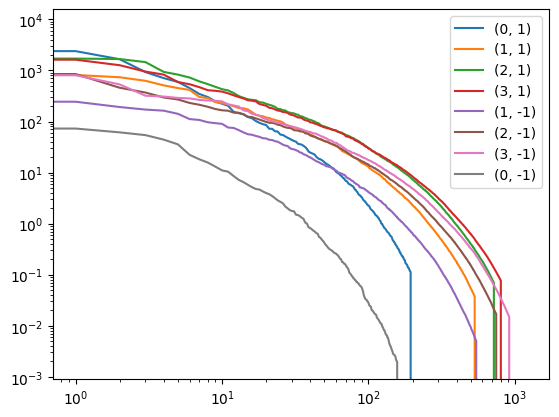

In [28]:
for i in range(len(rho4i_eva_blocks)):
    plt.loglog(rho4i_eva_blocks[i]*1e3, label = (rho4i.keys[i]["spherical_harmonics_l"],rho4i.keys[i]["inversion_sigma"] ))
plt.legend()

In [29]:
rho4i_pca= apply_pca(rho4i, rho4i_projection)
# # save('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho4i', rho4i )
# save('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho4i_pca', rho4i_pca )

In [30]:
rho5i = cg_increment(rho4i_pca, rho1i, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])

In [31]:
rho5i_forpca = operations.slice(rho5i, samples=Labels(['structure'],np.array(list(range(0,500,4)), np.int32).reshape(-1,1)) )


In [32]:
rho5i_projection, rho5i_vh_blocks, rho5i_eva_blocks = compute_rhoi_pca(rho5i_forpca, npca=[200, 700, 700, 700, 600, 600, 700,150])

singular values [1.00000000e+00 3.26834071e-01 2.71458576e-01 1.49704265e-01
 1.20211080e-01 9.03753853e-02 7.84905349e-02 5.52131266e-02
 4.82135925e-02 4.23479179e-02 3.69966961e-02 3.48582216e-02
 2.94616975e-02 2.65904744e-02 2.34135375e-02 2.27368092e-02
 2.06013078e-02 1.79150484e-02 1.62005577e-02 1.45898545e-02
 1.39201842e-02 1.24012253e-02 1.18483366e-02 1.13561667e-02
 1.10890564e-02 1.04371944e-02 1.00026613e-02 8.78570181e-03
 8.37568109e-03 8.04358236e-03 7.60756799e-03 7.20989768e-03
 6.58683754e-03 6.45166435e-03 6.25523336e-03 5.97763919e-03
 5.51460017e-03 5.23088557e-03 5.07158008e-03 4.79471918e-03
 4.50848431e-03 4.17826691e-03 4.13473475e-03 3.94478759e-03
 3.77641342e-03 3.65079675e-03 3.32575506e-03 3.27238656e-03
 3.05838372e-03 2.89200053e-03 2.80422971e-03 2.73551021e-03
 2.57804859e-03 2.47422509e-03 2.46133070e-03 2.38612672e-03
 2.21683870e-03 2.14503866e-03 2.07556800e-03 1.97123406e-03
 1.94273467e-03 1.82709004e-03 1.73161035e-03 1.70340439e-03
 1.65866

singular values [1.00000000e+00 3.22236570e-01 2.64583695e-01 1.97490488e-01
 1.70991563e-01 1.26639832e-01 1.22025558e-01 1.03343840e-01
 9.00074409e-02 8.68432826e-02 8.02497441e-02 7.66060020e-02
 7.47958226e-02 6.85427706e-02 6.49132178e-02 5.68963064e-02
 5.31742162e-02 5.24573444e-02 4.93562237e-02 4.79354070e-02
 4.38591706e-02 4.07684386e-02 3.96566593e-02 3.83338080e-02
 3.73465333e-02 3.31328125e-02 3.28372730e-02 3.18902807e-02
 3.12963712e-02 3.00929737e-02 2.87920164e-02 2.82245316e-02
 2.81317049e-02 2.69669889e-02 2.65351723e-02 2.53875717e-02
 2.52481229e-02 2.48188201e-02 2.38340247e-02 2.32496984e-02
 2.26294039e-02 2.17528616e-02 2.14589985e-02 2.10495734e-02
 2.04620967e-02 2.00102106e-02 1.97303523e-02 1.91725137e-02
 1.88070596e-02 1.86935633e-02 1.84021855e-02 1.80691959e-02
 1.75250100e-02 1.70522473e-02 1.66683021e-02 1.63897230e-02
 1.62007423e-02 1.58542705e-02 1.56773198e-02 1.54436016e-02
 1.51991143e-02 1.46307680e-02 1.43838682e-02 1.40729481e-02
 1.37396

singular values [1.00000000e+00 7.29292497e-01 5.94680428e-01 5.07678824e-01
 4.67451883e-01 3.80286742e-01 3.34688973e-01 3.22239723e-01
 3.01061105e-01 2.90209708e-01 2.47841087e-01 2.17167018e-01
 2.06369971e-01 1.87709232e-01 1.85532410e-01 1.78439265e-01
 1.71689786e-01 1.64867806e-01 1.58082392e-01 1.46565347e-01
 1.42408987e-01 1.35979923e-01 1.33592294e-01 1.31256993e-01
 1.23949062e-01 1.23444160e-01 1.17360042e-01 1.14345633e-01
 1.11111295e-01 1.06973454e-01 1.04094988e-01 1.03253774e-01
 1.01160835e-01 9.67164885e-02 9.46060636e-02 9.02316644e-02
 8.95661244e-02 8.72797870e-02 8.50094187e-02 8.07794624e-02
 7.87656063e-02 7.66834105e-02 7.49646225e-02 7.40317550e-02
 7.16095878e-02 6.97116037e-02 6.84612663e-02 6.75707961e-02
 6.47231395e-02 6.32229468e-02 6.20558998e-02 6.13437194e-02
 6.03586742e-02 5.90499061e-02 5.61130031e-02 5.37070712e-02
 5.35797443e-02 5.21485932e-02 5.13208557e-02 5.01879708e-02
 4.86534963e-02 4.81614316e-02 4.75763424e-02 4.73309740e-02
 4.62731

singular values [1.00000000e+00 8.96097898e-01 5.76180523e-01 3.68001454e-01
 3.45539560e-01 3.36830955e-01 3.09463608e-01 2.92861947e-01
 2.83746020e-01 2.72802036e-01 2.61789964e-01 2.38386964e-01
 2.19379535e-01 1.99099295e-01 1.88907709e-01 1.72330095e-01
 1.65150095e-01 1.47025810e-01 1.39049508e-01 1.37411110e-01
 1.29068472e-01 1.24287911e-01 1.19688852e-01 1.16244216e-01
 1.11897738e-01 1.09355395e-01 1.07625530e-01 1.02064797e-01
 9.85860692e-02 9.67792044e-02 9.46919135e-02 9.32196470e-02
 9.06001887e-02 8.69982477e-02 8.49467362e-02 8.18457565e-02
 8.05832287e-02 7.89781162e-02 7.77374800e-02 7.74960075e-02
 7.63879483e-02 7.49011744e-02 7.06766575e-02 6.96479863e-02
 6.80877214e-02 6.76401941e-02 6.50043696e-02 6.34744055e-02
 6.27753703e-02 6.26803175e-02 6.15558218e-02 6.03153399e-02
 5.89738945e-02 5.84523006e-02 5.72438729e-02 5.50622759e-02
 5.38864264e-02 5.33156203e-02 5.25177353e-02 5.17032657e-02
 5.11663198e-02 5.06407116e-02 5.02647164e-02 4.97552968e-02
 4.92313

singular values [1.00000000e+00 6.63960730e-01 4.57131108e-01 3.58619873e-01
 3.45400022e-01 2.62765933e-01 2.16295548e-01 1.40039816e-01
 1.31448800e-01 1.14589486e-01 1.06400276e-01 1.04396375e-01
 9.94152985e-02 8.76571230e-02 7.16103055e-02 6.57234037e-02
 6.20676982e-02 5.63814043e-02 5.50730737e-02 4.61134948e-02
 4.41895727e-02 4.10631685e-02 3.90982677e-02 3.60302215e-02
 3.26759729e-02 3.03713230e-02 2.91866171e-02 2.84670149e-02
 2.73045474e-02 2.45650490e-02 2.40356756e-02 2.20705950e-02
 2.17801481e-02 1.85365032e-02 1.77054468e-02 1.73996649e-02
 1.73204927e-02 1.65751654e-02 1.59925725e-02 1.48544409e-02
 1.42888573e-02 1.40068020e-02 1.28908348e-02 1.19579150e-02
 1.11637065e-02 1.06886202e-02 1.04554006e-02 9.94749765e-03
 9.45070531e-03 9.20015027e-03 8.45582016e-03 8.06985952e-03
 7.77798964e-03 7.14884801e-03 6.82635401e-03 6.33036224e-03
 6.25195975e-03 6.11755637e-03 5.98661251e-03 5.52938620e-03
 5.29418433e-03 4.76381845e-03 4.57693358e-03 4.24052768e-03
 4.01240

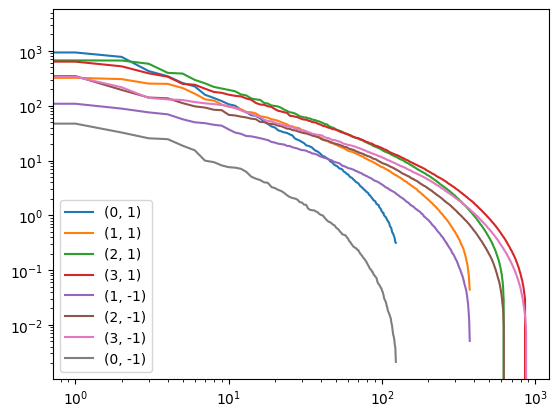

In [33]:
for i in range(len(rho5i_eva_blocks)):
    plt.loglog(rho5i_eva_blocks[i]*1e3, label = (rho5i.keys[i]["spherical_harmonics_l"],rho5i.keys[i]["inversion_sigma"] ))

plt.legend()

In [34]:
rho5i_pca= apply_pca(rho5i, rho5i_projection)
# # save('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho5i', rho5i )
# save('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho5i_pca', rho5i_pca )

In [62]:
# np.save('rho2i_vh_blocks.npy',rho2i_vh_blocks)
# np.save('rho2i_eva_blocks.npy', rho2i_eva_blocks)

# np.save('rho3i_vh_blocks.npy',rho3i_vh_blocks)
# np.save('rho3i_eva_blocks.npy', rho3i_eva_blocks)

# np.save('rho4i_vh_blocks.npy',rho4i_vh_blocks)
# np.save('rho4i_eva_blocks.npy', rho4i_eva_blocks)

# np.save('rho5i_vh_blocks.npy',rho5i_vh_blocks)
# np.save('rho5i_eva_blocks.npy', rho5i_eva_blocks)


/scratch/nigam/anaconda3/envs/py3.7/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [18]:
rho1i = load('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho1i.npz')
rho2i_pca = load('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho2i_pca.npz')
rho3i_pca = load('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho3i_pca.npz')
rho4i_pca = load('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho4i_pca.npz')
rho5i_pca = load('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho5i_pca.npz')

In [19]:
rho6i = cg_increment(rho5i_pca, rho1i, clebsch_gordan=cg, lcut=3, other_keys_match=["species_center"])

In [20]:
rho6i_forpca = operations.slice(rho6i, samples=Labels(['structure'],np.array(list(range(0,4000,16)), np.int32).reshape(-1,1)) )

In [37]:
rho6i_projection, rho6i_vh_blocks, rho6i_eva_blocks = compute_rhoi_pca(rho6i, npca=[150, 300, 300, 300, 200, 300, 300,120])

singular values [1.00000000e+00 3.63191665e-01 2.79346124e-01 1.59719892e-01
 1.23392899e-01 1.13236590e-01 8.31140474e-02 6.56996559e-02
 5.45839096e-02 4.83673176e-02 4.51057963e-02 3.93579372e-02
 3.64383282e-02 3.20782038e-02 2.98590583e-02 2.71530729e-02
 2.38551954e-02 2.22818811e-02 2.19756684e-02 1.86649706e-02
 1.83144560e-02 1.76874847e-02 1.59339993e-02 1.52687183e-02
 1.50182011e-02 1.43966422e-02 1.32591345e-02 1.30845715e-02
 1.16073864e-02 1.11704058e-02 1.05799516e-02 9.74390098e-03
 9.38458808e-03 8.58199239e-03 8.43409713e-03 8.30571079e-03
 7.93741703e-03 7.44763403e-03 7.39630736e-03 7.08692685e-03
 6.47181790e-03 6.37590945e-03 6.21671810e-03 5.84650466e-03
 5.55712346e-03 5.50195496e-03 5.11992969e-03 5.02404451e-03
 4.92373918e-03 4.68324689e-03 4.60798045e-03 4.38067719e-03
 4.27783669e-03 4.21912524e-03 4.09674887e-03 3.92018052e-03
 3.74358815e-03 3.53283550e-03 3.49983517e-03 3.38201954e-03
 3.31110787e-03 3.23579250e-03 3.18039044e-03 3.10588885e-03
 2.91256

singular values [1.         0.351422   0.25506669 0.21303757 0.17000883 0.13177783
 0.1189939  0.11025249 0.09838367 0.08840661 0.08511364 0.08004039
 0.07572557 0.07062226 0.06533889 0.06199283 0.05620056 0.05355121
 0.0530021  0.05022266 0.04744298 0.04518154 0.04399311 0.03934176
 0.03818899 0.03736718 0.03602558 0.03475329 0.03407733 0.03206104
 0.03142238 0.03039215 0.03011825 0.02920979 0.02842864 0.02800088
 0.02774721 0.02656748 0.02618086 0.02580713 0.02533467 0.02450734
 0.02420832 0.02373424 0.02340094 0.02243757 0.02126233 0.02102607
 0.02049702 0.02017635 0.01999417 0.01942807 0.01912568 0.01858651
 0.01845639 0.01790542 0.01744943 0.01732794 0.01710754 0.01696215
 0.01651757 0.01624462 0.01593478 0.01588533 0.01563183 0.01547968
 0.01545717 0.01508061 0.01496149 0.01473243 0.01457887 0.01434243
 0.01403573 0.01381148 0.01376501 0.013355   0.01328573 0.01307561
 0.01287961 0.01259    0.01242389 0.01240519 0.01229768 0.01213244
 0.01187401 0.01166593 0.01158516 0.01139309 0

singular values [1.         0.82175648 0.56434192 0.34595356 0.33763038 0.31999412
 0.30702048 0.30042294 0.26214312 0.26140892 0.25622915 0.25081123
 0.21502739 0.20769472 0.19501977 0.1762689  0.16899018 0.15780019
 0.14953355 0.14224916 0.12616113 0.1223976  0.12039868 0.11964387
 0.11610577 0.11092358 0.10769646 0.1037702  0.10151159 0.09894571
 0.09752787 0.09578037 0.09363857 0.09250411 0.09143412 0.09062792
 0.08696026 0.0865939  0.08522345 0.08330441 0.08182606 0.08081926
 0.07674244 0.07572803 0.07500094 0.07205512 0.07129538 0.06975529
 0.06854638 0.06709792 0.0664801  0.06414142 0.06361592 0.06297157
 0.06145102 0.06089451 0.06012221 0.05878064 0.05788764 0.05711152
 0.0559895  0.05562724 0.054168   0.0538201  0.05349184 0.05251242
 0.05184319 0.05107531 0.05058625 0.05006973 0.0495279  0.04907803
 0.0485203  0.04791327 0.04664854 0.04588736 0.04528155 0.04459056
 0.04414807 0.04346739 0.04309532 0.04196151 0.04154837 0.04118683
 0.04025475 0.04003804 0.03969252 0.03940541 0

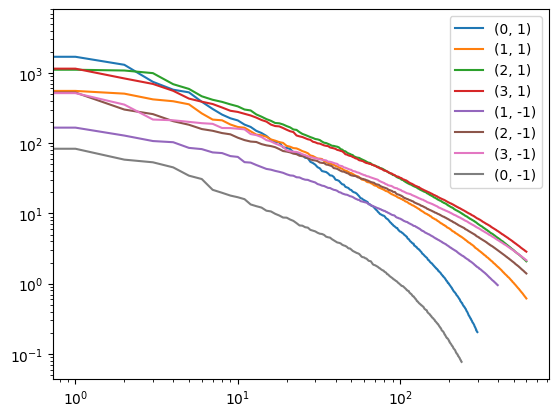

In [38]:
for i in range(len(rho6i_eva_blocks)):
    plt.loglog(rho6i_eva_blocks[i]*1e3, label = (rho6i.keys[i]["spherical_harmonics_l"],rho6i.keys[i]["inversion_sigma"] ))

plt.legend()

In [39]:
rho6i_pca= apply_pca(rho6i, rho6i_projection)
# save('/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/rho6i_pca', rho6i_pca )

In [40]:
rho7i = cg_increment(rho6i_pca, rho1i, clebsch_gordan=cg, lcut=0, other_keys_match=["species_center"])

In [ ]:
# save(feat_file+'rho1i', rho1i )
# save(feat_file+'rho2i_pca', rho2i_pca )
# save(feat_file+'rho3i_pca', rho3i_pca )
# save(feat_file+'rho4i_pca', rho4i_pca )
# save(feat_file+'rho5i_pca', rho5i_pca )
# save(feat_file+'rho6i_pca', rho5i_pca )
# save(feat_file+'rho7i', rho7i )

In [21]:
# feat_file = '/Users/jigyasa/scratch/bispectrum_counter/features/n6l3/'
# rho1i = load(feat_file+'rho1i.npz' )
# rho2i_pca  = load(feat_file+'rho2i_pca.npz' )
# rho3i_pca =load(feat_file+'rho3i_pca.npz')
# rho4i_pca= load(feat_file+'rho4i_pca.npz')
# rho5i_pca= load(feat_file+'rho5i_pca.npz')
# rho6i_pca= load(feat_file+'rho6i_pca.npz' )
# rho7i= load(feat_file+'rho7i.npz')

# device = "cpu"
# raw = np.hstack([
#     rho1i.block(inversion_sigma=1,spherical_harmonics_l=0).values.squeeze(),
#     rho2i_pca.block(inversion_sigma=1,spherical_harmonics_l=0).values.squeeze(),
#     rho3i_pca.block(inversion_sigma=1,spherical_harmonics_l=0).values.squeeze(),
#     rho3i_pca.block(inversion_sigma=-1,spherical_harmonics_l=0).values.squeeze(),
#     rho4i_pca.block(inversion_sigma=1,spherical_harmonics_l=0).values.squeeze(),
#     rho4i_pca.block(inversion_sigma=-1,spherical_harmonics_l=0).values.squeeze(),
#     rho5i_pca.block(inversion_sigma=1,spherical_harmonics_l=0).values.squeeze(),
#     rho5i_pca.block(inversion_sigma=-1,spherical_harmonics_l=0).values.squeeze(),
#     rho6i_pca.block(inversion_sigma=1,spherical_harmonics_l=0).values.squeeze(),
#     rho6i_pca.block(inversion_sigma=-1,spherical_harmonics_l=0).values.squeeze(),
#     rho7i.block(inversion_sigma=1,spherical_harmonics_l=0).values.squeeze(),
#     rho7i.block(inversion_sigma=-1,spherical_harmonics_l=0).values.squeeze()
# ])
# feats_nu_to7 = torch.tensor(PCA(n_components=min(raw.shape[0],raw.shape[-1])).fit_transform(raw) / np.sqrt((raw**2).sum(axis=1).mean()))
# import hickle
# hickle.dump(raw, feat_file+'feat_1234567.hickle')
# del rho1i, rho2i, rho3i, rho4i, rho5i, rho6i, rho7i
# del rho2i_pca, rho3i_pca, rho4i_pca, rho5i_pca, rho6i_pca, rho7i
# del rho2i_forpca, rho3i_forpca,rho4i_forpca,rho5i_forpca,rho6i_forpca

In [ ]:
calculator = PairExpansion(**hypers)
gij = calculator.compute(frames)
gij = operations.slice(gij, samples=Labels(['first_atom'],np.array([[0]], np.int32)) )
gij =  acdc_standardize_keys(gij)
# for b in gij.blocks():
#     b.values[:]/=norm_rho1
gij = simplify_gij(gij)

In [ ]:
rhoii1i2_nu0 = cg_combine(gij, gij, clebsch_gordan=cg, other_keys_match=['species_center'], lcut=3)
rhoii1i2_nu0_center = operations.slice(rhoii1i2_nu0, samples=Labels(['center'],np.array([[0]], np.int32)) )

In [ ]:
rhoii1i2_nu1 =  cg_combine(rho1i, rhoii1i2_nu0_center, clebsch_gordan=cg, other_keys_match = ['species_center'], lcut=0)

In [ ]:
device = "cpu"
raw = np.hstack([rhoii1i2_nu1.block(0).values.squeeze(),rhoii1i2_nu1.block(1).values.squeeze()])
feats_n2nu1 = torch.tensor(PCA(n_components=min(raw.shape[0],raw.shape[-1])).fit_transform(raw)/ np.sqrt((raw**2).sum(axis=1).mean()), device=device)

In [ ]:
# rhoii1i2_nu1_center = operations.slice(rhoii1i2_nu1, samples=Labels(['center'],np.array([[0]], np.int32)) )
# raw = np.hstack([rhoii1i2_nu1_center.block(0).values.squeeze(),rhoii1i2_nu1_center.block(1).values.squeeze()])
# feats_n2nu1_center = torch.tensor(PCA(n_components=min(raw.shape[0],raw.shape[-1])).fit_transform(raw)/ np.sqrt((raw**2).sum(axis=1).mean()), device=device)

In [ ]:
del rhoii1i2_nu0#, rhoii1i2_nu1

In [ ]:
# save(feat_file+'rhoii1i2_nu1_center', rhoii1i2_nu1 )

## Load NICE style features

In [10]:
import torch
device= "cpu"
from sklearn.decomposition import PCA

In [11]:
# feat_file = '/Users/jigyasa/scratch/bispectrum_counter/features/n6l3/'
feat_file = '/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/'

In [112]:
from equistore.io import load
aa=load(feat_file+'rho7i.npz')

In [115]:
aa.block(0).values[0] - aa.block(0).values[1]

_RustNDArray([[-1.04983472e-07,  7.73998607e-08, -1.96878688e-06, ...,
               -5.61161818e-07, -8.66985912e-08, -2.86752991e-09]])

1.7998527357289966

In [12]:
triple_sample_array = np.load(feat_file + 'triple_samples.npy')
triple_sample_names = np.load(feat_file + 'triple_samples_names.npy')
triple_samples = Labels(list(triple_sample_names), triple_sample_array)

In [13]:
feats_nu_to7 = hickle.load(feat_file + 'feat_1234567_PCA.hickle')
feats_nu_to7 = torch.tensor(feats_nu_to7, device=device)

In [15]:
feats_n2nu1 = hickle.load(feat_file+ 'feat_3cnu1_PCA.hickle' )
feats_n2nu1 = torch.tensor(feats_n2nu1, device=device)

In [16]:
nu7norm = np.sqrt((feats_nu_to7**2).sum(axis=1).mean())
print(nu7norm)
n2nu1norm = np.sqrt((feats_n2nu1**2).sum(axis=1).mean())

tensor(0.4163, dtype=torch.float64)


In [17]:
allidx = range(2000*2)
trainidx = range(1800*2)
testidx = list(set(allidx).difference(trainidx))

In [106]:
nu7norm

tensor(0.4163)

## encode-decodde 2

In [6]:
import torch 
device='cpu'
torch.set_default_dtype(torch.float64)

In [7]:
def StructureMap(samples_structure, device="cpu"):
    unique_structures, unique_structures_idx = np.unique(
        samples_structure, return_index=True
    )
    new_samples = samples_structure[np.sort(unique_structures_idx)]
    # we need a list keeping track of where each atomic contribution goes
    # (e.g. if structure ids are [3,3,3,1,1,1,6,6,6] that will be stored as
    # the unique structures [3, 1, 6], structure_map will be
    # [0,0,0,1,1,1,2,2,2]
    replace_rule = dict(zip(unique_structures, range(len(unique_structures))))
    structure_map = torch.tensor(
        [replace_rule[i] for i in samples_structure],
        dtype=torch.long,
        device=device,
    )
    return structure_map, new_samples, replace_rule

In [8]:
class BlockEncoderDecoder(torch.nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encode_type = kwargs['encode_type']
    
        if self.encode_type == 'linear':
            self.encoder_output_layer = torch.nn.Linear(
            in_features=kwargs["input_size"], out_features=kwargs["intermediate_size"]
        )

        else:
            self.encoder_hidden_layer = torch.nn.Linear(
                in_features=kwargs["input_size"], out_features=kwargs["hidden_size"]
            )

            self.encoder_output_layer = torch.nn.Linear(
                in_features=kwargs["hidden_size"], out_features=kwargs["intermediate_size"]
            )


        self.decoder_hidden_layer = torch.nn.Linear(
            in_features=kwargs["intermediate_size"], out_features=kwargs["hidden_size"]
        )
#         if 'output_size' in kwargs:
#             self.decoder_output_layer = torch.nn.Linear(
#             in_features=kwargs["intermediate_size"], out_features=kwargs["hidden_size"]
#         )
        if 'output_size' in kwargs:
            self.decoder_output_layer = torch.nn.Linear(
            in_features=kwargs["hidden_size"], out_features=kwargs["output_size"]
        )
        else:
            self.decoder_output_layer = torch.nn.Linear(
            in_features=kwargs["hidden_size"], out_features=kwargs["input_size"]
            )

        self.sum_triples=None
        self.samples = kwargs["triple_samples"]
        self.to(device)

    def structure_wise_feats(self, x):
        if self.encode_type == 'linear':
            #x = torch.from_numpy(x)
            encoded = self.encoder_output_layer(x)
#             print("encoded_shape", encoded.shape)

        else:
            #x = torch.from_numpy(x.values)
            encoded = self.encoder_hidden_layer(x)
            activation = torch.tanh(encoded)
            encoded = self.encoder_output_layer(activation)
            encoded = torch.tanh(encoded)
#             print("encoded_shape", encoded.shape)

        structure_map, new_samples, _ = StructureMap(
            self.samples["structure"], "cpu"
        )
#         print(encoded.shape)
        self.sum_triples =  torch.zeros((len(new_samples), encoded.shape[-1]), device=x.device)
        self.sum_triples.index_add_(0, structure_map, encoded)

        return self.sum_triples
    
    def forward(self, x):
#         print("from block forward", x.keys)
        activation = self.decoder_hidden_layer(x)
        activation = torch.tanh(activation)
        activation = self.decoder_output_layer(activation)
        decoded = torch.tanh(activation)
#         print("decoded_shape", decoded.shape)
        return decoded


In [9]:
feat_file = '/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/'
triple_sample_array = np.load(feat_file + 'triple_samples.npy')
triple_sample_names = np.load(feat_file + 'triple_samples_names.npy')
triple_samples = Labels(list(triple_sample_names), triple_sample_array)

In [11]:
feats_nu_to7 = hickle.load(feat_file + 'feat_1234567_PCA.hickle')
feats_nu_to7 = torch.tensor(feats_nu_to7, device=device)

feats_n2nu1 = hickle.load(feat_file+ 'feat_3cnu1_PCA.hickle' )
feats_n2nu1 = torch.tensor(feats_n2nu1, device=device)

feats_n2nu1.shape

torch.Size([256000, 7344])

In [10]:
input_size = feats_n2nu1.shape[-1]
hidden_size = 256
intermediate_size = 128
encode_type = 'linear'
output_size =  feats_n2nu1.shape[-1]

model_block = BlockEncoderDecoder(input_size=input_size, hidden_size=hidden_size, 
                                  intermediate_size=intermediate_size, encode_type=encode_type, 
                                  triple_samples = triple_samples, output_size = output_size
                                
                                                     )            

input_size = feats_n2nu1.shape[-1]
hidden_size = 256
intermediate_size = 128
encode_type = 'nonlinear'
output_size =  100#feats_nu_to7.shape[-1]

model_block_nonl = BlockEncoderDecoder(input_size=input_size, hidden_size=hidden_size, 
                                  intermediate_size=intermediate_size, encode_type=encode_type, 
                                  triple_samples = triple_samples, output_size = output_size
                                
                                      )

NameError: name 'feats_n2nu1' is not defined

In [13]:
feats = model_block.structure_wise_feats(feats_n2nu1)
feats_nonl = model_block_nonl.structure_wise_feats(feats_n2nu1)

### optimize the nonlinear feature

In [20]:
def mse_loss(pred, target):
    return torch.mean((pred - target)**2)

In [14]:
target = feats_nu_to7[:,:output_size]

In [16]:
total = int(len(frames)/2)

ntrain=1800
allidx = range(total*2)
trainidx = range(ntrain*2)
testidx = list(set(allidx).difference(trainidx))

In [17]:
optimizer = torch.optim.Adam(
        model_block_nonl.parameters(),
        lr=0.0001
    )

In [ ]:
n_epochs = 2000
for epoch in range(0, n_epochs):
    
    optimizer.zero_grad()
    struct_feat = model_block_nonl.structure_wise_feats(feats_n2nu1) 
    predicted = model_block_nonl.forward(struct_feat) 
    loss = mse_loss(predicted[trainidx], target[trainidx])
    loss.backward(retain_graph=False)
    optimizer.step()
    
    
    if epoch % 10 ==0:
        print("Epoch:", epoch, "RMSE: train ", np.sqrt(loss.detach().numpy().flatten()[0]/len(trainidx)),
     "test", np.sqrt(mse_loss(predicted[testidx], target[testidx]).detach().numpy().flatten()[0]/ len(testidx))
         )

Epoch: 0 RMSE: train  0.006151985474482032 test 0.018483677861318333
Epoch: 10 RMSE: train  0.0031586042254096846 test 0.009501661880551357
Epoch: 20 RMSE: train  0.0012580070995385714 test 0.0038547260554830875
Epoch: 30 RMSE: train  0.0011380701096584287 test 0.003502134903973208
Epoch: 40 RMSE: train  0.0008419188219972729 test 0.0026186519725226245
Epoch: 50 RMSE: train  0.0007381071322460737 test 0.002335513215714677
Epoch: 60 RMSE: train  0.0007069238634734112 test 0.002252106621150673
Epoch: 70 RMSE: train  0.000687861589008565 test 0.0021936280271029097


In [18]:
predicted.shape

NameError: name 'predicted' is not defined

In [84]:
predicted = model_block_nonl.forward(struct_feat)

In [83]:
print(len(trainidx))
print(len(testidx))

3600
400


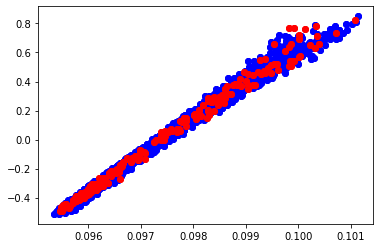

In [90]:
plt.scatter(predicted[trainidx,0].detach().numpy(), target[trainidx,0], c ='b')
plt.scatter(predicted[testidx,0].detach().numpy(), target[testidx,0], c ='r')

In [85]:
predicted.shape

torch.Size([4000, 100])

### optimize linear encoded model 

In [63]:
target = feats_nu_to7
input_size = feats_n2nu1.shape[-1]
hidden_size = 256
intermediate_size = 128
encode_type = 'nonlinear'
output_size = target.shape[-1] #128 #
# target = target[:,:output_size]
model_block = BlockEncoderDecoder(input_size=input_size, hidden_size=hidden_size, 
                                  intermediate_size=intermediate_size, encode_type=encode_type, 
                                  triple_samples = triple_samples, output_size = output_size
                                
                                                   )            
struct_feat = model_block.structure_wise_feats(feats_n2nu1.squeeze())        
recons = model_block.forward(struct_feat) 
print(recons.shape)

torch.Size([4000, 4000])


In [64]:
# target = torch.from_numpy(rho3i.block(spherical_harmonics_l = 0, inversion_sigma = 1).values.squeeze())
target = feats_nu_to7[:,:output_size]
print(target.shape)

torch.Size([4000, 4000])


In [30]:
optimizer = torch.optim.Adam(
        model_block.parameters(),
        lr=0.01,
    )

In [31]:
nepochs = 200

for epoch in range(nepochs):
    optimizer.zero_grad()
#     loss = torch.zeros(size=(1,), device=device)
    struct_feat = model_block.structure_wise_feats(feats_n2nu1)        
    predicted = model_block.forward(struct_feat) 
    loss = mse_loss(predicted[trainidx], target[trainidx])

    loss.backward()

    optimizer.step()
#     print(loss)
    
#     if epoch % 5 ==0:
    print("Epoch:", epoch, "RMSE: train ", np.sqrt(loss.detach().numpy().flatten()[0]/len(trainidx)),
     "test", np.sqrt(mse_loss(predicted[testidx], target[testidx]).detach().numpy().flatten()[0]/ len(testidx))
         )

Epoch: 0 RMSE: train  22.92327467577634 test 22.923352792144968
Epoch: 1 RMSE: train  50.652514049059064 test 50.653844488893036
Epoch: 2 RMSE: train  52.50119335842441 test 52.49775207246229
Epoch: 3 RMSE: train  34.5816481936504 test 34.582990651896104
Epoch: 4 RMSE: train  30.848909442963826 test 30.85021005933582
Epoch: 5 RMSE: train  29.78017125958806 test 29.780923822402137
Epoch: 6 RMSE: train  26.269571326473628 test 26.268978730562218
Epoch: 7 RMSE: train  28.154119442934515 test 28.14997459785492
Epoch: 8 RMSE: train  29.703775952715535 test 29.704299866757413
Epoch: 9 RMSE: train  26.555167113131212 test 26.556181578046772
Epoch: 10 RMSE: train  25.273242139165994 test 25.27361385548958
Epoch: 11 RMSE: train  23.715527875335823 test 23.71538825464124
Epoch: 12 RMSE: train  21.80797824298151 test 21.807917805780516
Epoch: 13 RMSE: train  20.969198419059946 test 20.96990193381942
Epoch: 14 RMSE: train  20.308681263619793 test 20.310037168335928
Epoch: 15 RMSE: train  18.914676

KeyboardInterrupt: 

In [71]:
optimizer = torch.optim.LBFGS(
        model_block.parameters(),
        lr=1e-4,
        line_search_fn="strong_wolfe",
        history_size=256,
    )

In [72]:
output_size = 100
model_block = BlockEncoderDecoder(input_size=input_size, hidden_size=hidden_size, 
                                  intermediate_size=intermediate_size, encode_type=encode_type, 
                                  triple_samples = triple_samples, output_size = output_size
                                
                                                   )   

target = feats_nu_to7[:,:output_size]
print(target.shape)

torch.Size([4000, 100])


In [73]:
nepochs = 200

for epoch in range(nepochs):
    
    def single_step():
        optimizer.zero_grad()
        loss = torch.zeros(size=(1,), device=device)
        struct_feat = model_block.structure_wise_feats(feats_n2nu1)
        predicted = model_block(struct_feat)
        loss += mse_loss(predicted[trainidx], target[trainidx])
        loss.backward()
        return loss

    loss = optimizer.step(single_step)
#     print(loss)
    struct_feat = model_block.structure_wise_feats(feats_n2nu1)
    predicted = model_block(struct_feat) #, triplet_samples["structure"][ntrain*ntriples:])
    
#     if epoch % 5 ==0:
    print("Epoch:", epoch, "RMSE: train ", np.sqrt(loss.detach().numpy().flatten()[0]/len(trainidx)),
     "test", np.sqrt(mse_loss(predicted[testidx], target[testidx]).detach().numpy().flatten()[0]/ len(testidx))
         )

Epoch: 0 RMSE: train  357.9844343937745 test 358.30315939228143
Epoch: 1 RMSE: train  357.9844343937745 test 358.30315939228143


KeyboardInterrupt: 

In [68]:
predicted

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<TanhBackward>)

In [69]:
list(model_block.parameters())

[Parameter containing:
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0

In [13]:
np.save?

In [ ]:
def fit(self,traindata_loader, loss_function, optimizer_type, lr, reg, n_epochs):
        if optimizer_type == "Adam":
            optimizer = torch.optim.Adam(self.parameters(), lr = lr, weight_decay = reg.item())
            threshold = 200
            scheduler_threshold = 50
            tol = 0
            history_step = 1000
        
        elif optimizer_type == "LBFGS":
            optimizer = torch.optim.LBFGS(self.parameters(), lr = lr)
            threshold = 30
            scheduler_threshold = 10
            tol = 0
            history_step = 10
            
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, scheduler_threshold, gamma = 0.5)
        best_state = copy.deepcopy(self.state_dict())
        lowest_loss = torch.tensor(9999)
        pred_loss = torch.tensor(0)
        trigger = 0
        loss_history = []
        pbar = tqdm(range(n_epochs))
        
        for epoch in pbar:
            pbar.set_description(f"Epoch: {epoch}")
            pbar.set_postfix(pred_loss = pred_loss.item(), lowest_loss = lowest_loss.item(), trigger = trigger)
            
            for x_data, structure in traindata_loader: 
                optimizer.zero_grad()
                #x_data, y_data = x_data.to(self.device), y_data.to(self.device)
                if optimizer_type == "LBFGS":
                    def closure():
                        optimizer.zero_grad()
                        _pred = self.forward(x_data)                                        
                        _pred_loss = loss_function(_pred, x_data.block().values)
                        _pred_loss = torch.nan_to_num(_pred_loss, nan=lowest_loss.item(), posinf = lowest_loss.item(), neginf = lowest_loss.item())                 
                        _reg_loss = self.get_regression_values(reg.item()) #Only works for 1 layer
                        _new_loss = _pred_loss + _reg_loss
                        _new_loss.backward()
                        return _new_loss
                    optimizer.step(closure)

                elif optimizer_type == "Adam":
                    pred = self.forward(x_data)
#                     print(pred, x_data.block().values )
                    pred_loss = loss_function(pred, torch.from_numpy(x_data.block().values))
                    
                    #reg_loss = self.get_regression_values(reg.item())#Only works for 1 layer
                    new_loss = pred_loss #+ reg_loss
                    new_loss.backward()

                    optimizer.step()
                
            with torch.no_grad():
                current_loss = 0 
                for x_data, structure in traindata_loader:
                    pred = self.forward(x_data)
                    current_loss  += loss_function(pred, torch.from_numpy(x_data.block().values)) #Loss should be normalized already
                pred_loss = current_loss
                reg_loss = self.get_regression_values(reg.item()) 
                new_loss = pred_loss + reg_loss
                if pred_loss >100000 or (pred_loss.isnan().any()) :
                    print ("Optimizer shows weird behaviour, reinitializing at previous best_State")
                    self.load_state_dict(best_state)
                    if optimizer_type == "Adam":
                        optimizer = torch.optim.Adam(self.parameters(), lr = lr, weight_decay = reg.item())
                    elif optimizer_type == "LBFGS":
                        optimizer = torch.optim.LBFGS(self.parameters(), lr = lr)

                if epoch % history_step == 1:
                    loss_history.append(lowest_loss.item())
                
                if lowest_loss - new_loss > tol: #threshold to stop training
                    best_state = copy.deepcopy(self.state_dict())
                    lowest_loss = new_loss 
                    trigger = 0    
                    
                else:
                    trigger += 1
                    scheduler.step()
                    if trigger > threshold:
                        self.load_state_dict(best_state)
                        print ("Implemented early stopping with lowest_loss: {}".format(lowest_loss))
                        return loss_history
        return loss_history
    
    def get_regression_values(self, reg_weights):
        output = []
        for param in self.parameters():
            output.append(torch.sum(torch.pow(param,2)))
        try:
            output = torch.sum(torch.tensor(output) * reg_weights)
        except:
            output = 0
        return output

## Pair error metrics

$\epsilon(|E_\pm|)=\frac{1}{n_\text{test}} \sum_{A^\pm} |\frac{1}{2}(\tilde{E}(A^+)+\tilde{E}(A^-)) - \frac{1}{2}({E}(A^+)+{E}(A^-))|^2 $

In [5]:
import numpy as np 
from ase.io import read
import hickle
import ast 
import torch 
torch.set_default_dtype(torch.float64)
device ="cpu"

In [6]:
frames = read('/home/nigam/scratch/equistore-examples/data/three_center/boron/boron8_4000_pbeccpvdz.xyz', ':4000')
minstruc = read('/home/nigam/scratch/MAC/bispectrum_counter/minimized_b8_struct.xyz', ':')[0]
# minimized_en = minstruc.info['energy_ha']
# explicit name for manifold parameters, and baseline for energy
e0 = minstruc.info['energy_ha']
for fi, f in enumerate(frames):
    f.info["energy_rel_eV"] = (f.info["energy_ha"]-e0)#*Hartree
    for n, v in zip( ("index", "label","r", "z_1", "z_2", "psi", "phi_1", "phi_2"), ast.literal_eval(f.info["pars"]) ):
        f.info[n] = v
    if fi%2 ==1:
        frames[fi].info["delta"] = np.abs(frames[fi].info["energy_rel_eV"]-frames[fi-1].info["energy_rel_eV"])
        frames[fi-1].info["delta"] = frames[fi].info["delta"]

energy = torch.tensor([f.info["energy_rel_eV"] for f in frames], device=device)
print(torch.min(energy), torch.max(energy))

tensor(0.1733) tensor(1.1140)


In [25]:
def get_pair_meandelta_energies(x):
    npairs = int(len(x)/2)
#     assert(len(frames)/2 == npairs)
    mean_pair = torch.zeros(npairs)
    delta_pair = torch.zeros(npairs)
    for pair_id, idx in enumerate(range(0,len(x),2)):
        mean_pair[pair_id] = (x[idx] + x[idx+1])/2
        delta_pair[pair_id] = (x[idx] - x[idx+1])/2
    return mean_pair, delta_pair
def get_pair_meandelta_feats(x):
    npairs = int(len(x)/2)
#     assert(len(frames)/2 == npairs)
    mean_pair = []#torch.zeros(npairs)
    delta_pair = []#torch.zeros(npairs)
    for pair_id, idx in enumerate(range(0,len(x),2)):
        mean_pair.append((x[idx] + x[idx+1])/2)
        delta_pair.append((x[idx] - x[idx+1])/2)
    return mean_pair, delta_pair

In [19]:
feat_file = '/home/nigam/scratch/MAC/bispectrum_counter/features/n6l3/without_normalization/'
feats_nu_to7 = hickle.load(feat_file + 'feat_1234567_PCA.hickle')
feats_nu_to7 = torch.tensor(feats_nu_to7, device=device)

In [37]:
feats_n2nu1 = hickle.load(feat_file+ 'feat_3cnu1_PCA.hickle' )
feats_n2nu1 = torch.tensor(feats_n2nu1, device=device)

In [26]:
ref_mean_rhoi7,ref_delta_rhoi7 = get_pair_meandelta_feats(feats_nu_to7[:, :100])
# torch.vstack(ref_delta_rhoi7).mean(axis=1)
# torch.vstack(ref_mean_rhoi7).mean(axis=1)

In [38]:
e0

-198.27291671238572

tensor([ 6.0088e-04, -2.4537e-03, -6.7512e-05,  ..., -3.4106e-03,
        -1.1103e-03, -2.7109e-03])

## encoder-decoder like architecture - nope

In [242]:
import equistore
import torch
import equistore.operations as operations
from tqdm import tqdm
torch.set_default_dtype(torch.float64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  


class featDataset(torch.utils.data.Dataset):
    #Dataset class
    def __init__(self, feature_path, frames):
        #
        self.features = np.load(feature_path, mmap_mode = 'r')
        self.keys_features = equistore.io._labels_from_npz(self.features["keys"])
        self.currentkey = 0
        self.frames = frames

    def __len__(self):
        return len(self.frames)
    
    def __getitem__(self, structure_idx):
        feature_block, feature_key = self.generate_feature_block(self.features, structure_idx)        
        #samples_filter, target_block_samples = self.get_index_from_idx(self.target.block(self.currentkey).samples, structure_idx)
        structure = [frames[i] for i in structure_idx]
        #Modify feature_block to tensormap
        feature_map = TensorMap(feature_key, feature_block)
        return feature_map, structure

    
    def generate_feature_block(self, memmap, structure_idx):
        #Generate the block from npz file
        output = []
        if self.currentkey is None:
            feature_key = self.keys_features     
        else:
            feature_key = Labels(["order_nu", "inversion_sigma", "spherical_harmonics_l", "species_center", "species_neighbor_a", "species_neighbor_b"], 
                                 np.asarray(self.keys_features[self.currentkey].astype(list), dtype=np.int32).reshape(-1,6))

#             feature_key = [self.keys_features[self.currentkey]]
        for key in feature_key:
            block_index = list(self.keys_features).index(key)
            prefix = f"blocks/{block_index}/values"        
            block_samples = equistore.io._labels_from_npz(memmap[f"{prefix}/samples"])
            block_components = []
            for i in range(1):
                block_components.append(equistore.io._labels_from_npz(memmap[f"{prefix}/components/{i}"]))
            block_properties = equistore.io._labels_from_npz(memmap[f"{prefix}/properties"])
             

            samples_filter, block_samples = self.get_index_from_idx(block_samples, structure_idx)

            block_data = memmap[f"{prefix}/data"][samples_filter]
            block = TensorBlock(block_data, block_samples, block_components, block_properties)
            output.append(block)
        return output, feature_key
    
    def get_n_properties(self, memmap, key):
        block_index = list(self.keys_features).index(key)
        prefix = f"blocks/{block_index}/values"  
        block_properties = equistore.io._labels_from_npz(memmap[f"{prefix}/properties"])
        
        return len(block_properties)
    
    def get_index_from_idx(self, block_samples, structure_idx):
        #Get samples label from IDX
        samples = Labels(names = ['structure'], values = np.array(structure_idx).reshape(-1,1))
        all_samples = block_samples[['structure']].tolist()
        set_samples_to_slice = set(samples.tolist())
        samples_filter = np.array(
            [sample in set_samples_to_slice for sample in all_samples]
        )
        new_samples = block_samples[samples_filter]
        
        return samples_filter, new_samples
    
    def collate_output_values(blocks):
        feature_out = []
        for sample_output in blocks:
            feature_block, structure = sample_output
            for z in feature_block:
                feature_out.append(torch.tensor(z.values))

        return feature_out


In [21]:
def mse_loss(pred, target):
    return torch.mean((pred - target)**2)


class BlockEncoderDecoder(torch.nn.Module):
    def __init__(self, seed=123, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = torch.nn.Linear(
            in_features=kwargs["input_size"], out_features=kwargs["hidden_size"]
        )
        self.encoder_output_layer = torch.nn.Linear(
            in_features=kwargs["hidden_size"], out_features=kwargs["intermediate_size"]
        )
        self.decoder_hidden_layer = torch.nn.Linear(
            in_features=kwargs["intermediate_size"], out_features=kwargs["hidden_size"]
        )
        self.decoder_output_layer = torch.nn.Linear(
            in_features=kwargs["hidden_size"], out_features=kwargs["input_size"]
        )
        self.to(device)
        
    def forward(self, x):
        print("from block forward", x.keys)
        x = torch.from_numpy(x.block().values)
        activation = self.encoder_hidden_layer(x)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

    
    def fit(self,traindata_loader, loss_function, optimizer_type, lr, reg, n_epochs):
        if optimizer_type == "Adam":
            optimizer = torch.optim.Adam(self.parameters(), lr = lr, weight_decay = reg.item())
            threshold = 200
            scheduler_threshold = 50
            tol = 0
            history_step = 1000
        
        elif optimizer_type == "LBFGS":
            optimizer = torch.optim.LBFGS(self.parameters(), lr = lr)
            threshold = 30
            scheduler_threshold = 10
            tol = 0
            history_step = 10
            
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, scheduler_threshold, gamma = 0.5)
        best_state = copy.deepcopy(self.state_dict())
        lowest_loss = torch.tensor(9999)
        pred_loss = torch.tensor(0)
        trigger = 0
        loss_history = []
        pbar = tqdm(range(n_epochs))
        
        for epoch in pbar:
            pbar.set_description(f"Epoch: {epoch}")
            pbar.set_postfix(pred_loss = pred_loss.item(), lowest_loss = lowest_loss.item(), trigger = trigger)
            
            for x_data, structure in traindata_loader: 
                optimizer.zero_grad()
                #x_data, y_data = x_data.to(self.device), y_data.to(self.device)
                if optimizer_type == "LBFGS":
                    def closure():
                        optimizer.zero_grad()
                        _pred = self.forward(x_data)                                        
                        _pred_loss = loss_function(_pred, x_data.block().values)
                        _pred_loss = torch.nan_to_num(_pred_loss, nan=lowest_loss.item(), posinf = lowest_loss.item(), neginf = lowest_loss.item())                 
                        _reg_loss = self.get_regression_values(reg.item()) #Only works for 1 layer
                        _new_loss = _pred_loss + _reg_loss
                        _new_loss.backward()
                        return _new_loss
                    optimizer.step(closure)

                elif optimizer_type == "Adam":
                    pred = self.forward(x_data)
#                     print(pred, x_data.block().values )
                    pred_loss = loss_function(pred, torch.from_numpy(x_data.block().values))
                    
                    #reg_loss = self.get_regression_values(reg.item())#Only works for 1 layer
                    new_loss = pred_loss #+ reg_loss
                    new_loss.backward()

                    optimizer.step()
                
            with torch.no_grad():
                current_loss = 0 
                for x_data, structure in traindata_loader:
                    pred = self.forward(x_data)
                    current_loss  += loss_function(pred, torch.from_numpy(x_data.block().values)) #Loss should be normalized already
                pred_loss = current_loss
                reg_loss = self.get_regression_values(reg.item()) 
                new_loss = pred_loss + reg_loss
                if pred_loss >100000 or (pred_loss.isnan().any()) :
                    print ("Optimizer shows weird behaviour, reinitializing at previous best_State")
                    self.load_state_dict(best_state)
                    if optimizer_type == "Adam":
                        optimizer = torch.optim.Adam(self.parameters(), lr = lr, weight_decay = reg.item())
                    elif optimizer_type == "LBFGS":
                        optimizer = torch.optim.LBFGS(self.parameters(), lr = lr)

                if epoch % history_step == 1:
                    loss_history.append(lowest_loss.item())
                
                if lowest_loss - new_loss > tol: #threshold to stop training
                    best_state = copy.deepcopy(self.state_dict())
                    lowest_loss = new_loss 
                    trigger = 0    
                    
                else:
                    trigger += 1
                    scheduler.step()
                    if trigger > threshold:
                        self.load_state_dict(best_state)
                        print ("Implemented early stopping with lowest_loss: {}".format(lowest_loss))
                        return loss_history
        return loss_history
    
    def get_regression_values(self, reg_weights):
        output = []
        for param in self.parameters():
            output.append(torch.sum(torch.pow(param,2)))
        try:
            output = torch.sum(torch.tensor(output) * reg_weights)
        except:
            output = 0
        return output


    

class ThreeCenterModel(torch.nn.ModuleDict):
    
    def __init__(self, feature, hidden_size=128, intermediate_size=18):
        super().__init__()
        self.feature = feature
        self.loss_history={}
        self.models = torch.nn.ModuleDict()
        for k, b in self.feature:
            input_size = b.values.shape[-1]
#             print(k,input_size, hidden_size, intermediate_size)
            self.models[str(k)] = BlockEncoderDecoder(input_size=input_size, hidden_size=hidden_size, intermediate_size=intermediate_size)            
        self.to(device)
    
    def forward(self, feature):
        pred_blocks =[]
        for k, block in feature:
#             print(self[str(k)])
            
            recons = self.models[str(k)].forward(block) # expects a tensorMap
            
            newblock = TensorBlock(
                        values=recons.reshape(block.values.shape),
                        samples=block.samples,
                        components=block.components,
                        properties= block.properties
                    )
            pred_blocks.append(newblock) 
        
        keys = feature.keys
        pred_target = TensorMap(keys, pred_blocks)
        return(pred_target)
    
    def fit(self, train_dataloader, regularization_dict, optimizer_type, n_epochs, loss_function, lr):
        #Iterates through the keys of self.model, then for each key we will fit self.model[key] with data[key]
        total = len(self.models)
        for index, key in enumerate(self.feature.keys):
            print ("Now training on Block {} of {}".format(index, total))
            train_dataloader.dataset.currentkey = index
            
            loss_history_key = self.models[str(key)].fit(train_dataloader, loss_function, optimizer_type, lr, regularization_dict[str(key)], n_epochs)

            self.loss_history[str(key)] = loss_history_key

    
    


In [22]:
regularization_dict={}
for key in rhoii1i2_nu1.keys:
    regularization_dict[str(key)] = torch.tensor(0)

In [23]:
def collate_blocks(block_tuple):
    feature_tensor_map, structure_array = block_tuple[0]
    return feature_tensor_map, structure_array

train_feature_path ="./rhoii1i2n1_400.npz"
train = featDataset(train_feature_path, frames[:400])
train_Sampler = torch.utils.data.sampler.SequentialSampler(train)
train_BSampler = torch.utils.data.sampler.BatchSampler(train_Sampler, batch_size = 500, drop_last = False)

test_feature_path ="./rhoii1i2n1_400-500.npz"
test = featDataset(train_feature_path, frames[400:500])
test_Sampler = torch.utils.data.sampler.SequentialSampler(test)
test_BSampler = torch.utils.data.sampler.BatchSampler(test_Sampler, batch_size = 500, drop_last = False)

train_loader = torch.utils.data.DataLoader(train, sampler = train_BSampler, collate_fn = collate_blocks)
test_loader = torch.utils.data.DataLoader(test, sampler = test_BSampler, collate_fn = collate_blocks)

In [24]:
# rhoii1i2_nu1.keys[
rhoii1i2_nu1.blocks_matching(species_center=3)
# ]

[9, 10, 11, 12, 13, 14, 15, 16, 17]

In [25]:
model = ThreeCenterModel(rhoii1i2_nu1)

In [26]:
model.fit(train_loader, regularization_dict, optimizer_type="Adam", n_epochs=2, loss_function=mse_loss, lr=0.01)

Now training on Block 0 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 1, 1, 1)]
from block forward [(3, 1, 0, 1, 1, 1)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.94it/s, lowest_loss=0.000316, pred_loss=0.000316, trigger=0]


from block forward [(3, 1, 0, 1, 1, 1)]
from block forward [(3, 1, 0, 1, 1, 1)]
Now training on Block 1 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 1, 1, 3)]


Epoch: 1:   0%|                                                                                   | 0/2 [00:00<?, ?it/s, lowest_loss=0.000289, pred_loss=0.000289, trigger=0]

from block forward [(3, 1, 0, 1, 1, 3)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.65it/s, lowest_loss=0.000289, pred_loss=0.000289, trigger=0]


from block forward [(3, 1, 0, 1, 1, 3)]
from block forward [(3, 1, 0, 1, 1, 3)]
Now training on Block 2 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 1, 1, 12)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  2.98it/s, lowest_loss=0.000274, pred_loss=0.000274, trigger=0]

from block forward [(3, 1, 0, 1, 1, 12)]
from block forward [(3, 1, 0, 1, 1, 12)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.59it/s, lowest_loss=0.000274, pred_loss=0.000274, trigger=0]


from block forward [(3, 1, 0, 1, 1, 12)]
Now training on Block 3 of 27


Epoch: 1:   0%|                                                                                     | 0/2 [00:00<?, ?it/s, lowest_loss=0.00033, pred_loss=0.00033, trigger=0]

from block forward [(3, 1, 0, 1, 3, 1)]
from block forward [(3, 1, 0, 1, 3, 1)]
from block forward [(3, 1, 0, 1, 3, 1)]


Epoch: 1: 100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.25it/s, lowest_loss=0.00033, pred_loss=0.00033, trigger=0]


from block forward [(3, 1, 0, 1, 3, 1)]
Now training on Block 4 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 1, 3, 3)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.19it/s, lowest_loss=0.000274, pred_loss=0.000274, trigger=0]


from block forward [(3, 1, 0, 1, 3, 3)]
from block forward [(3, 1, 0, 1, 3, 3)]
from block forward [(3, 1, 0, 1, 3, 3)]
Now training on Block 5 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 1, 3, 12)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  4.48it/s, lowest_loss=0.000313, pred_loss=0.000313, trigger=0]

from block forward [(3, 1, 0, 1, 3, 12)]
from block forward [(3, 1, 0, 1, 3, 12)]
from block forward [(3, 1, 0, 1, 3, 12)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.75it/s, lowest_loss=0.000313, pred_loss=0.000313, trigger=0]


Now training on Block 6 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 1, 12, 1)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  3.03it/s, lowest_loss=0.000278, pred_loss=0.000278, trigger=0]

from block forward [(3, 1, 0, 1, 12, 1)]
from block forward [(3, 1, 0, 1, 12, 1)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.13it/s, lowest_loss=0.000278, pred_loss=0.000278, trigger=0]


from block forward [(3, 1, 0, 1, 12, 1)]
Now training on Block 7 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 1, 12, 3)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  4.61it/s, lowest_loss=0.000262, pred_loss=0.000262, trigger=0]

from block forward [(3, 1, 0, 1, 12, 3)]
from block forward [(3, 1, 0, 1, 12, 3)]
from block forward [(3, 1, 0, 1, 12, 3)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.97it/s, lowest_loss=0.000262, pred_loss=0.000262, trigger=0]


Now training on Block 8 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 1, 12, 12)]
from block forward [(3, 1, 0, 1, 12, 12)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:01<00:01,  1.61s/it, lowest_loss=0.000236, pred_loss=0.000236, trigger=0]

from block forward [(3, 1, 0, 1, 12, 12)]
from block forward [(3, 1, 0, 1, 12, 12)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it, lowest_loss=0.000236, pred_loss=0.000236, trigger=0]


Now training on Block 9 of 27


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  9.27it/s, lowest_loss=0.000246, pred_loss=0.000246, trigger=0]

from block forward [(3, 1, 0, 3, 1, 1)]
from block forward [(3, 1, 0, 3, 1, 1)]
from block forward [(3, 1, 0, 3, 1, 1)]
from block forward [(3, 1, 0, 3, 1, 1)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.99it/s, lowest_loss=0.000246, pred_loss=0.000246, trigger=0]


Now training on Block 10 of 27


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.86it/s, lowest_loss=0.000291, pred_loss=0.000291, trigger=0]


from block forward [(3, 1, 0, 3, 1, 3)]
from block forward [(3, 1, 0, 3, 1, 3)]
from block forward [(3, 1, 0, 3, 1, 3)]
from block forward [(3, 1, 0, 3, 1, 3)]
Now training on Block 11 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 3, 1, 12)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  2.64it/s, lowest_loss=0.000322, pred_loss=0.000322, trigger=0]

from block forward [(3, 1, 0, 3, 1, 12)]
from block forward [(3, 1, 0, 3, 1, 12)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.84it/s, lowest_loss=0.000322, pred_loss=0.000322, trigger=0]


from block forward [(3, 1, 0, 3, 1, 12)]
Now training on Block 12 of 27


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  9.94it/s, lowest_loss=0.000278, pred_loss=0.000278, trigger=0]

from block forward [(3, 1, 0, 3, 3, 1)]
from block forward [(3, 1, 0, 3, 3, 1)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.21it/s, lowest_loss=0.000278, pred_loss=0.000278, trigger=0]


from block forward [(3, 1, 0, 3, 3, 1)]
from block forward [(3, 1, 0, 3, 3, 1)]
Now training on Block 13 of 27


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  7.94it/s, lowest_loss=0.000309, pred_loss=0.000309, trigger=0]

from block forward [(3, 1, 0, 3, 3, 3)]
from block forward [(3, 1, 0, 3, 3, 3)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.78it/s, lowest_loss=0.000309, pred_loss=0.000309, trigger=0]

from block forward [(3, 1, 0, 3, 3, 3)]
from block forward [(3, 1, 0, 3, 3, 3)]
Now training on Block 14 of 27



Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 3, 3, 12)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  1.80it/s, lowest_loss=0.000303, pred_loss=0.000303, trigger=0]

from block forward [(3, 1, 0, 3, 3, 12)]
from block forward [(3, 1, 0, 3, 3, 12)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.92it/s, lowest_loss=0.000303, pred_loss=0.000303, trigger=0]


from block forward [(3, 1, 0, 3, 3, 12)]
Now training on Block 15 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 3, 12, 1)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  2.97it/s, lowest_loss=0.000336, pred_loss=0.000336, trigger=0]

from block forward [(3, 1, 0, 3, 12, 1)]
from block forward [(3, 1, 0, 3, 12, 1)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.02it/s, lowest_loss=0.000336, pred_loss=0.000336, trigger=0]


from block forward [(3, 1, 0, 3, 12, 1)]
Now training on Block 16 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 3, 12, 3)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  1.65it/s, lowest_loss=0.000288, pred_loss=0.000288, trigger=0]

from block forward [(3, 1, 0, 3, 12, 3)]
from block forward [(3, 1, 0, 3, 12, 3)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.78it/s, lowest_loss=0.000288, pred_loss=0.000288, trigger=0]


from block forward [(3, 1, 0, 3, 12, 3)]
Now training on Block 17 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 3, 12, 12)]
from block forward [(3, 1, 0, 3, 12, 12)]


Epoch: 1:  50%|██████████████████████████████████████▌                                      | 1/2 [00:10<00:10, 10.12s/it, lowest_loss=0.00034, pred_loss=0.00034, trigger=0]

from block forward [(3, 1, 0, 3, 12, 12)]
from block forward [(3, 1, 0, 3, 12, 12)]


Epoch: 1: 100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [00:17<00:00,  8.57s/it, lowest_loss=0.00034, pred_loss=0.00034, trigger=0]


Now training on Block 18 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 12, 1, 1)]
from block forward [(3, 1, 0, 12, 1, 1)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  3.13it/s, lowest_loss=0.000322, pred_loss=0.000322, trigger=0]

from block forward [(3, 1, 0, 12, 1, 1)]
from block forward [(3, 1, 0, 12, 1, 1)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.39it/s, lowest_loss=0.000322, pred_loss=0.000322, trigger=0]


Now training on Block 19 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 12, 1, 3)]
from block forward [(3, 1, 0, 12, 1, 3)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  4.04it/s, lowest_loss=0.000277, pred_loss=0.000277, trigger=0]

from block forward [(3, 1, 0, 12, 1, 3)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.00it/s, lowest_loss=0.000277, pred_loss=0.000277, trigger=0]

from block forward [(3, 1, 0, 12, 1, 3)]
Now training on Block 20 of 27



Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 12, 1, 12)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:00<00:00,  1.03it/s, lowest_loss=0.000318, pred_loss=0.000318, trigger=0]

from block forward [(3, 1, 0, 12, 1, 12)]
from block forward [(3, 1, 0, 12, 1, 12)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.09it/s, lowest_loss=0.000318, pred_loss=0.000318, trigger=0]

from block forward [(3, 1, 0, 12, 1, 12)]
Now training on Block 21 of 27



Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 12, 3, 1)]
from block forward [(3, 1, 0, 12, 3, 1)]


Epoch: 1:  50%|██████████████████████████████████████▌                                      | 1/2 [00:00<00:00,  2.41it/s, lowest_loss=0.00029, pred_loss=0.00029, trigger=0]

from block forward [(3, 1, 0, 12, 3, 1)]


Epoch: 1: 100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.66it/s, lowest_loss=0.00029, pred_loss=0.00029, trigger=0]


from block forward [(3, 1, 0, 12, 3, 1)]
Now training on Block 22 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 12, 3, 3)]
from block forward [(3, 1, 0, 12, 3, 3)]


Epoch: 1:  50%|██████████████████████████████████████▌                                      | 1/2 [00:00<00:00,  1.24it/s, lowest_loss=0.00037, pred_loss=0.00037, trigger=0]

from block forward [(3, 1, 0, 12, 3, 3)]


Epoch: 1: 100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.19it/s, lowest_loss=0.00037, pred_loss=0.00037, trigger=0]


from block forward [(3, 1, 0, 12, 3, 3)]
Now training on Block 23 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 12, 3, 12)]
from block forward [(3, 1, 0, 12, 3, 12)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:03<00:03,  3.08s/it, lowest_loss=0.000274, pred_loss=0.000274, trigger=0]

from block forward [(3, 1, 0, 12, 3, 12)]
from block forward [(3, 1, 0, 12, 3, 12)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.30s/it, lowest_loss=0.000274, pred_loss=0.000274, trigger=0]


Now training on Block 24 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 12, 12, 1)]
from block forward [(3, 1, 0, 12, 12, 1)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:01<00:01,  1.08s/it, lowest_loss=0.000341, pred_loss=0.000341, trigger=0]

from block forward [(3, 1, 0, 12, 12, 1)]
from block forward [(3, 1, 0, 12, 12, 1)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.17s/it, lowest_loss=0.000341, pred_loss=0.000341, trigger=0]


Now training on Block 25 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 12, 12, 3)]
from block forward [(3, 1, 0, 12, 12, 3)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:04<00:04,  4.51s/it, lowest_loss=0.000298, pred_loss=0.000298, trigger=0]

from block forward [(3, 1, 0, 12, 12, 3)]
from block forward [(3, 1, 0, 12, 12, 3)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.85s/it, lowest_loss=0.000298, pred_loss=0.000298, trigger=0]


Now training on Block 26 of 27


Epoch: 0:   0%|                                                                                              | 0/2 [00:00<?, ?it/s, lowest_loss=9999, pred_loss=0, trigger=0]

from block forward [(3, 1, 0, 12, 12, 12)]
from block forward [(3, 1, 0, 12, 12, 12)]


Epoch: 1:  50%|█████████████████████████████████████▌                                     | 1/2 [00:19<00:19, 19.76s/it, lowest_loss=0.000311, pred_loss=0.000311, trigger=0]

from block forward [(3, 1, 0, 12, 12, 12)]
from block forward [(3, 1, 0, 12, 12, 12)]


Epoch: 1: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:39<00:00, 19.59s/it, lowest_loss=0.000311, pred_loss=0.000311, trigger=0]


In [28]:
for x_data, structures in test_loader:
#     print(x_data)
    pred = model(x_data)
#     print ("Test error for mse_full is {}".format(mse_full(pred, )))

AttributeError: 'TensorBlock' object has no attribute 'keys'

In [ ]:
# aa=[]
# bb=[]
# for x, y in train_loader:
#     aa.append(x)
#     bb.append(y)
# from itertools import chain
# list(chain.from_iterable(bb))==frames[:400]

## derivatives of coordinates

In [41]:
def points_on_circle(r,phi):
    return np.array([[r * np.cos(p), r * np.sin(p)] for p in phi])

def rotate_vector_2d(psi, cartesian_pos):
    """
    Rotate points in cartesian_pos (a vector of (x,y)) by angle psi in 2D
    """
    matrix = np.zeros((2,2))
    matrix[0,0] = np.cos(psi)
    matrix[0,1] = -np.sin(psi)
    matrix[1,0] = np.sin(psi)
    matrix[1,1] = np.cos(psi)

    return np.einsum("ij, nj-> ni", matrix, cartesian_pos)

def generate_nu3_degen_structs(r,phi,psi,z1,z2, center_species='C', ring_species='H', z2species='O'):
    from ase import Atoms
    structs = []
    n = len(phi)
    layer1 = points_on_circle(r,phi)    
    layer2 = rotate_vector_2d(psi, layer1)
    for idx_str in range(2):
        positions = np.zeros((2*n+2,3))
        positions[1:n+1,:2] = layer1
        positions[1:n+1, 2] = z1
        positions[n+1:1+2*n,:2] = layer2
        positions[n+1:1+2*n, 2] = -z1
        #add z1 to layer1
        #add -z1 to layer2
        if idx_str ==0:
            positions[2*n+1, 2] = z2
        else:
            positions[2*n+1, 2] = -z2

        atom_string = center_species + ring_species*(2*n) + z2species
        atoms = Atoms(atom_string, positions=positions, cell=np.eye(3)*10)

        structs.append(atoms)

    return structs

In [89]:
def single_partial_derivative(parameters, diff_param_names=['r', 'phi', 'psi', 'z1', 'z2'], diff_param=None, delta=1e-6):
    #parameters is a list of [r,phi, psi, z1,z2, sp1, sp2, sp3]
    #diff_param cane be r, phi, psi, z1, z2
    if diff_param is None or isinstance(diff_param, list): 
        print(diff_param, len(diff_param))
        raise ValueError("please specify a single variable name along which to compute partial derivative")
        
    delta_parameters = parameters.copy()
    diff_idx = diff_param_names.index(diff_param)
    delta_parameters[diff_idx]+=delta
    coords_plus, coords_minus = generate_nu3_degen_structs(*parameters )
    delta_coords_plus, delta_coords_minus = generate_nu3_degen_structs(*delta_parameters)
    
    partial_derivative_plus = (delta_coords_plus.positions - coords_plus.positions)/delta
    partial_derivative_minus = (delta_coords_minus.positions - coords_minus.positions)/delta
    return partial_derivative_plus, partial_derivative_minus
    

In [149]:
def analytical_partial_derivative(parameters, diff_param_names=['r', 'phi', 'psi', 'z1', 'z2'], diff_param=None):
    #parameters is a list of [r,phi, psi, z1,z2, sp1, sp2, sp3]
    #diff_param cane be r, phi, psi, z1, z2
    r,phi, psi, z1,z2, sp1, sp2, sp3 = parameters
    partial_derivative_plus={}
    partial_derivative_minus={}
    coords_plus, coords_minus = generate_nu3_degen_structs(*parameters )
    coords_plus = coords_plus.positions
    coords_minus = coords_minus.positions

    for par in diff_param_names:
        partial_derivative_plus[par] = np.zeros_like(coords_plus)
        partial_derivative_minus[par]= np.zeros_like(coords_minus)

    n = len(phi)
    #partial wrt z1
    partial_derivative_plus['z1'][1:n+1, 2] = 1 # z coord of layer 1 is z1
    partial_derivative_plus['z1'][n+1:2*n+1, 2] = -1  # z coord of layer 1 is -z1
    partial_derivative_minus['z1'][1:n+1, 2] = 1
    partial_derivative_minus['z1'][n+1:2*n+1, 2] = -1
    #partial wrt z2
    partial_derivative_plus['z2'][2*n+1, 2] = 1  # plus structure's last atom has z coord is z2 
    partial_derivative_minus['z2'][2*n+1, 2] = -1 # plus structure's last atom has z coord is -z2
    
    #partial wrt psi
    psimatrix = np.zeros((3,3))
    psimatrix[0,0] = -np.sin(psi)
    psimatrix[0,1] = -np.cos(psi)
    psimatrix[1,0] = np.cos(psi)
    psimatrix[1,1] = -np.sin(psi)
    psimatrix[2,2] = 1
    partial_derivative_plus['psi'][n+1:2*n+1] = np.einsum("ij, nj-> ni", psimatrix, coords_plus[1:n+1])  
    partial_derivative_minus['psi'] = partial_derivative_plus['psi'].copy()
    
    #partial wrt phi
    # x = rcos(phi) y =rsin(phi) --> x' = -y and y' = x
    partial_derivative_plus['phi'][:,0] = -coords_plus[:,1]
    partial_derivative_plus['phi'][:,1] = coords_plus[:,0]
    partial_derivative_minus['phi'] = partial_derivative_plus['phi'].copy()
    
    #partial wrt r 
    #  x' = cos(phi), y' = sin(phi)
    assert isinstance(phi,list)
    phi_2n = np.array(phi+phi)
    partial_derivative_plus['r'][1:2*n+1, 0] = np.cos(phi_2n)
    partial_derivative_plus['r'][1:2*n+1, 0] = np.sin(phi_2n)
    
    partial_derivative_minus['r'] = partial_derivative_plus['r'].copy()
    
    if diff_param is None:
        return partial_derivative_plus, partial_derivative_minus
    elif isinstance(diff_param, list): 
        plus = {}
        minus={}
        for p in diff_param:
            plus[p] = partial_derivative_plus[p]
            minus[p] = partial_derivative_minus[p]
            
        return plus, minus
    else: 
        return partial_derivative_plus[diff_param],partial_derivative_minus[diff_param]
    

In [150]:
analytical_partial_derivative(parameters, diff_param_names=['r', 'phi', 'psi', 'z1', 'z2'], diff_param='phi')

(array([[-0.        ,  0.        ,  0.        ],
        [-0.        ,  0.78713564,  0.        ],
        [-0.68602276,  0.38594726,  0.        ],
        [ 0.65937015, -0.42989943,  0.        ],
        [-0.7609544 , -0.20132291,  0.        ],
        [-0.19764848, -0.76191705,  0.        ],
        [ 0.24695558,  0.74739244,  0.        ],
        [-0.        ,  0.        ,  0.        ]]),
 array([[-0.        ,  0.        ,  0.        ],
        [-0.        ,  0.78713564,  0.        ],
        [-0.68602276,  0.38594726,  0.        ],
        [ 0.65937015, -0.42989943,  0.        ],
        [-0.7609544 , -0.20132291,  0.        ],
        [-0.19764848, -0.76191705,  0.        ],
        [ 0.24695558,  0.74739244,  0.        ],
        [-0.        ,  0.        ,  0.        ]]))

In [99]:
def derivatives_finite_differences(parameters, diff_param = None, delta=1e-6):
    # use the single partial derivative across multiple parameters if necessary 
    # using f(x+deltax, y+deltay) = f(x,y) + partial f/x deltax + partial f/y delta y 
    if diff_param is None or not isinstance(diff_param, list): 
        raise ValueError("please specify variable name(s) along which to compute partial derivative, single param should also be passed as list")
    
    for p in diff_param: 
        der_plus, der_minus = single_partial_derivative(parameters, diff_param_names=['r', 'phi', 'psi', 'z1', 'z2'], diff_param=p, delta=delta)
    
    return None

In [90]:
r = np.random.uniform(0.5,2)
z1 = np.random.uniform(0.5,2)
z2 = np.random.uniform(1.5,1.8)
psi = np.random.uniform(0,np.pi)
phi1 = np.random.uniform(np.pi/6, np.pi)
phi2 = np.random.uniform(np.pi/6, np.pi)

parameters = [r, [0, phi1, phi1+phi2], psi, z1, z2, "B", "B", "B"]

In [102]:
single_partial_derivative(parameters, diff_param_names=['r', 'phi', 'psi', 'z1', 'z2'], diff_param='psi', delta=1e-6)


(array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.7609543 , -0.2013233 ,  0.        ],
        [-0.1976481 , -0.76191715,  0.        ],
        [ 0.24695521,  0.74739256,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.7609543 , -0.2013233 ,  0.        ],
        [-0.1976481 , -0.76191715,  0.        ],
        [ 0.24695521,  0.74739256,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]))

In [101]:
np.cos(psi)

-0.25576648319427947

In [88]:
generate_nu3_degen_structs(*parameters )[0].positions, generate_nu3_degen_structs(*parameters )[1].positions

(array([[ 0.        ,  0.        ,  0.        ],
        [ 0.63695147,  0.        ,  1.25065117],
        [-0.54923659,  0.32256216,  1.25065117],
        [-0.53183582, -0.35051083,  1.25065117],
        [ 0.63675506,  0.01581671, -1.25065117],
        [-0.55707706,  0.30882411, -1.25065117],
        [-0.52296797, -0.36360924, -1.25065117],
        [ 0.        ,  0.        ,  1.5060294 ]]),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.63695147,  0.        ,  1.25065117],
        [-0.54923659,  0.32256216,  1.25065117],
        [-0.53183582, -0.35051083,  1.25065117],
        [ 0.63675506,  0.01581671, -1.25065117],
        [-0.55707706,  0.30882411, -1.25065117],
        [-0.52296797, -0.36360924, -1.25065117],
        [ 0.        ,  0.        , -1.5060294 ]]))

In [ ]:
def derivatives_finite_differences(parameters, diff_param = None, delta=1e-6):
    
    r, phi,psi, z1, z2 = parameters

    if diff_param is None:
        diff_param = parameters.copy()
    else: 
        parameter_names = 
    par_idx = parameters.index(diff_param)
    
    
    parameters = parameters.copy()
    delta_parameters = parameters.copy()
    delta_coords += delta

    

    for _, _, spherical_expansion, _, _ in dataloader:
        predicted_e, predicted_f = model(spherical_expansion, forward_forces=True)

    finite_diff = - (predicted_e[1] - predicted_e[0]) / delta
    print("finite difference =", finite_diff.item())
    print("computed gradient =", predicted_f[3, 1].item())

## old

In [325]:
frames=[]
for r in range(2,6):
    for n in range(3,6):
        angles = np.linspace(0.01, 2*np.pi/n-0.1, 5)
        for psi in angles:
            for z1 in range(2,5):
                for z2 in range(z1+1, 6):
                    splus, sminus = generate_nu3_degen_structs(r=r,n=n,psi=psi,z1=z1,z2=z2,center_species='Li', ring_species='Mg', z2species='H')
                    frames.append(splus)
                    frames.append(sminus)

for f in frames: 
    f.center()
# view(frames)

In [326]:
idx = [653, 652, 641, 636, 631, 621, 619, 618, 466, 454, 453, 451, 450, 444, 443, 437, 432, 428, 427, 423, 301, 
      300, 293, 279, 274, 264, 260, 255, 120, 118, 117, 116, 114, 111, 100, 98, 89, 86, 84, 77, 72, 67, 65
      ]
idx_not_conv = [629, 541, 540, 539, 538, 535, 534, 529, 528, 527, 526, 522, 517, 516, 515, 514, 511, 510, 505, 
                504, 503, 502, 493, 492, 491, 490, 487, 481, 480, 479, 478, 469, 468, 467, 457, 456, 455, 445,
                442, 433, 431, 430, 420, 409, 408, 407, 402, 397, 391, 385, 384, 373, 372, 361, 360, 349, 348,
                337, 336, 325, 324, 313, 312, 235, 234, 187, 186, 181, 180, 179, 178, 169, 168, 167, 166, 157, 
                156, 155, 154, 145, 144, 143, 142, 133, 132, 131, 130, 121, 109, 108, 105, 104, 103, 102, 97, 96,
                93, 92, 91, 90, 88, 85, 81, 80, 79, 78, 73
               ]
purge = idx + idx_not_conv
purge.sort()
purge_all = []
for i in purge: 
    if i%2==0 and i+1 not in purge: 
        purge_all.append(i)
        purge_all.append(i+1)
#         print(i, i+1, "even i, added")
    elif i%2==1 and i-1 not in purge: 
        purge_all.append(i-1)
        purge_all.append(i)
#         print(i-1, i, "odd i, added")
    else: 
        purge_all.append(i)
purge_all.reverse()
for i in purge_all: 
    frames.pop(i)

In [ ]:
en = []
for idx, f in enumerate(frames[2:]): 
    try:
        jj = pyscf_rks_calc(f)
        en.append(jj)
        print(idx+2, "done \n")
    except Exception as e: 
        print(e, idx+2, "\n")
        continue

converged SCF energy = -1207.79767639347
2 done 

converged SCF energy = -1207.7976765657
3 done 

converged SCF energy = -1207.77579124706
4 done 

converged SCF energy = -1207.77579136121
5 done 

converged SCF energy = -1207.73767133132
6 done 

converged SCF energy = -1207.73767132616
7 done 

converged SCF energy = -1207.77629071708
8 done 

converged SCF energy = -1207.77629081414
9 done 

converged SCF energy = -1207.75062998051
10 done 

converged SCF energy = -1207.75063003808
11 done 

converged SCF energy = -1207.73983085615
12 done 

converged SCF energy = -1207.73983091043
13 done 

converged SCF energy = -1207.79714773664
14 done 

converged SCF energy = -1207.79714826784
15 done 

converged SCF energy = -1207.77589524674
16 done 

converged SCF energy = -1207.77589560106
17 done 

converged SCF energy = -1207.73802120508
18 done 

converged SCF energy = -1207.73802119467
19 done 



/scratch/nigam/anaconda3/envs/py3.7/lib/python3.8/site-packages/pyscf/symm/Dmatrix.py:156: RuntimeWarning: invalid value encountered in arccos
  gamma = numpy.arccos(yp.dot(c2[1]))


converged SCF energy = -1207.77616328326
20 done 

converged SCF energy = -1207.77616358012
21 done 

converged SCF energy = -1207.75051591491
22 done 

converged SCF energy = -1207.7505160908
23 done 

converged SCF energy = -1207.7398212964
24 done 

converged SCF energy = -1207.73982146228
25 done 

converged SCF energy = -1207.79651885845
26 done 

converged SCF energy = -1207.79652203974
27 done 

converged SCF energy = -1207.77594181761
28 done 



/scratch/nigam/anaconda3/envs/py3.7/lib/python3.8/site-packages/pyscf/symm/Dmatrix.py:144: RuntimeWarning: invalid value encountered in arccos
  beta = numpy.arccos(zz)


converged SCF energy = -1207.77594391362
29 done 

converged SCF energy = -1207.73834094654
30 done 

converged SCF energy = -1207.73834082428
31 done 

converged SCF energy = -1207.77603265233
32 done 

converged SCF energy = -1207.77603447172
33 done 

converged SCF energy = -1207.75040072954
34 done 

converged SCF energy = -1207.75040179844
35 done 

converged SCF energy = -1207.73981109131
36 done 

converged SCF energy = -1207.73981213332
37 done 

converged SCF energy = -1207.79698997587
38 done 

converged SCF energy = -1207.79699703835
39 done 

converged SCF energy = -1207.7759133852
40 done 

converged SCF energy = -1207.77591799401
41 done 

converged SCF energy = -1207.73810942721
42 done 

converged SCF energy = -1207.73810901576
43 done 

converged SCF energy = -1207.77612818056
44 done 

converged SCF energy = -1207.77613223503
45 done 

converged SCF energy = -1207.75048472496
46 done 

converged SCF energy = -1207.75048712296
47 done 

converged SCF energy = -1207.739